<a href="https://colab.research.google.com/github/Wolfie3D/dsc-phase-2-project-v2-3/blob/Cynthia-Wanyeki/student_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission

Please fill out:
* Student name: **Cynthia Wangui Wanyeki**
* Student pace:  **full time**
* Scheduled project review date/time: **30th OCT 2023**
* Instructor name: **Diana Mong'ina**



**Stakeholder:** Real Estate Agency

**Business Problem:** Predicting the Impact of Home Renovations on Property Value

**Background:**
The real estate agency serves homeowners looking to buy and sell homes. For homeowners looking to sell their properties, understanding how specific home renovations might impact the estimated value of their homes is crucial. It can help homeowners make informed decisions on which renovations to prioritize to maximize their property's market value. Therefore, the business problem to address is predicting the impact of home renovations on property value accurately.

**Specifics of the Business Problem:**

***Home Renovation Recommendations:***

The real estate agency wants to provide homeowners with personalized recommendations on which home renovations are likely to increase the estimated value of their homes. These recommendations should be based on historical data and analysis.

***Estimation of Value Increase:***

Along with recommendations, homeowners need to know by what amount the estimated value of their homes is likely to increase as a result of specific renovations. This information is essential for homeowners to make informed decisions about renovation investments.

***Data-Driven Insights:***

The real estate agency aims to provide data-driven insights, rather than generic advice. Homeowners should receive tailored recommendations and estimates based on their property's characteristics, location, and the local real estate market conditions.

***Market Competitiveness:***

The agency wants to provide insights on how the recommended renovations will impact the competitiveness of the property in the local real estate market. For instance, will the renovation make the property more attractive compared to other listings in the area?

**Solution Approach:**

To address this business problem, the real estate agency can develop a predictive model that takes into account various features of a property (e.g., size, location, number of bedrooms, bathrooms, and current condition) along with information about potential renovations (e.g., kitchen remodel, bathroom upgrades, adding a bedroom) and estimates the increase in property value associated with each renovation.

The predictive model can be trained on historical real estate data with information about properties before and after renovations. This model will allow homeowners to input their property details and the renovations they are considering, and it will provide estimates of the expected value increase and market competitiveness.

The agency can also consider utilizing advanced techniques such as machine learning to improve the accuracy of predictions. Additionally, providing a range of potential value increases with associated confidence intervals can help homeowners make well-informed decisions.

By addressing this business problem, the real estate agency can offer a valuable service to homeowners, potentially attract more property listings, and establish itself as a trusted source for data-driven insights in the real estate market.

**Objective 1: Evaluate Return on Investment (ROI) for Home Renovations**

Conduct research to analyze the direct relationship between specific property renovations and the increase in resale value.
Quantify the ROI for various home improvement projects to identify the most cost-effective upgrades that yield substantial increases in home sale prices.

**Objective 2: Identify Key Property Features Impacting Sale Price**

Identify and analyze the specific property features that have the most significant influence on the sale price.
Determine the relative importance and the quantitative impact of these key features on a home's market value.

**Objective 3: Develop a Predictive Pricing Model for Home Sales**

Create a predictive pricing model capable of forecasting future sale prices of homes based on a comprehensive set of property attributes.

**Objective 4: Find out the settlement distribution**

Extract the price distribution of houses relative to location.

# 1. Importing Libraries

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
!pip install shap

#Modelling libraries
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import statsmodels.api as sm

# Set up preferences for visualization and plotting

# Display plots within the Jupyter Notebook (if using Jupyter Notebook)
%matplotlib inline

# Set the style of Seaborn plots to 'darkgrid'
sns.set_style('darkgrid')

# Set an option to display all columns in a DataFrame (no truncation)
pd.set_option('display.max_columns', None)

# Set up preferences for visualization:
#    - %matplotlib inline: This is a Jupyter Notebook magic command that enables the display of plots within the notebook.
#    - sns.set_style('darkgrid'): Sets the visual style for Seaborn plots to 'darkgrid,' which is one of Seaborn's built-in styles.
#    - pd.set_option('display.max_columns', None): Configures Pandas to display all columns in DataFrames without truncation.
#           This can be helpful when dealing with datasets containing many columns, as it ensures that all columns are visible.


# 2. Data Import and Auditing
In this section, we will focus on the initial steps of a data analysis, which involve importing the data and conducting an audit or examination of the dataset. our aim at this stage is essential checking and ensuring on the data's quality, understanding its structure, and preparing it for subsequent analysis.

## 2.1 Data Import
**Data Loading from CSV File**

In this section, we are focused on importing the dataset, which is stored in a CSV (Comma-Separated Values) file named 'kc_house_data.csv.' The line df = pd.read_csv('data\kc_house_data.csv') is a crucial step in the data analysis process, and here's a breakdown of what it entails:

**df**: This is a variable name assigned to the Pandas DataFrame that will hold our dataset. A DataFrame is a data structure provided by the Pandas library that allows for efficient data manipulation and analysis.

**pd**: This is an alias for the Pandas library, which is commonly used for data manipulation and analysis in Python.

**read_csv()**: read_csv is a Pandas function that is specifically designed to read data from CSV files and load it into a DataFrame.

**'data\kc_house_data.csv'**: This is the file path pointing to the location of the CSV file on your system. The 'data' directory appears to be the folder where the CSV file is stored. The 'kc_house_data.csv' file is the dataset that we want to import.

Upon executing this line, Pandas will read the 'kc_house_data.csv' file and create a DataFrame named 'df' to hold the dataset. This DataFrame can be used for various data analysis tasks, including data exploration, visualization, cleaning, and modeling. The df variable allows us to reference and work with the data throughout the analysis process.

In [4]:
df = pd.read_csv('/content/kc_house_data.csv', parse_dates=['date'])

## 2.2 Data View and Data Describing
This section is dedicated to obtaining an initial overview of the imported dataset, examining its dimensions, viewing the first few rows, understanding the data types and summary statistics of the columns, and listing the column names.

**Dimension of DataFrame**

***innitial_shape = df.shape***: This line is used to capture the initial shape of the DataFrame. The DataFrame 'df' contains the dataset, and its shape is represented as a tuple (number of rows, number of columns). This step helps you understand the size of your dataset.
Number of Columns

***for column in df.columns***: print(column): In this part, a loop iterates through the columns of the DataFrame 'df' and prints the names of each column. It's a simple way to list and confirm the column names in your dataset.
Data Viewing

***df.head(10)***: Here, the head() function is used to display the first 10 rows of the DataFrame 'df.' This allows you to visually inspect the dataset's structure and the actual data values. It's a quick way to get a feel for the data.
Understanding Data - Total Entries, Number of Columns, Datatype

**df.info()**: The info() method provides essential information about the DataFrame, such as the total number of entries (non-null values), the number of columns, and the data type of each column. This is valuable for detecting missing data and gaining an understanding of the data types.
Understanding Data and Description

***df.describe().T***: The describe() function generates a summary of descriptive statistics for each numerical column in the DataFrame. This summary includes measures like count, mean, standard deviation, minimum, maximum, and quartiles. The .T transposes the result, making it more readable with statistics as rows and column names as columns. This step helps in understanding the distribution of data and identifying potential outliers.
In summary, this section serves as an initial data exploration step where you obtain insights into the dataset's structure, data types, and some basic statistics. It's the first step towards understanding the data you'll be working with.

In [5]:
# Dimension of DataFrame
innitial_shape = df.shape
innitial_shape

(21597, 21)

In [6]:
# the number of Columns
for column in df.columns:
    print(column)

id
date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15


In [7]:
# Data Viewing
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1230000,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500,3,2.25,1715,6819,2.0,NO,NONE,Average,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850,3,1.50,1060,9711,1.0,NO,NaN,Average,7 Average,1060,0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,2015-04-15,229500,3,1.00,1780,7470,1.0,NO,NONE,Average,7 Average,1050,730,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000,3,2.50,1890,6560,2.0,NO,NONE,Average,7 Average,1890,0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [8]:
# Understanding Data - Total Entries, Number of Columns, Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  int64         
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [9]:
# Understanding Data and description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
sqft_above,21597.0,1.788597e+03,8.277598e+02,3.700000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
yr_built,21597.0,1.971000e+03,2.937523e+01,1.900000e+03,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03
yr_renovated,17755.0,8.363678e+01,3.999464e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015000e+03


## 2.3 Data Quality
In this "Data Quality" section, our primary focus is to assess the overall quality and cleanliness of the dataset. This is a crucial step in data preprocessing, as it ensures that the dataset is suitable for analysis. We perform two key data quality checks:

***Checking for Missing Values***

**df.isnull().sum()**
Here, we use the .isnull() function to pinpoint any missing values within the dataset. The .sum() method calculates the total count of missing values in each column. This information is invaluable for determining how to handle these missing values during data preprocessing.

***Duplicate Rows***

**df.duplicated().sum()**
We employ the .duplicated() function to identify duplicate rows in the dataset. The .sum() method quantifies the total count of duplicated rows. Detecting and managing duplicate entries is critical for maintaining data integrity and ensuring the precision of analyses, as duplicated data can lead to biased results.

These data quality assessments serve as foundational steps in data preprocessing, guaranteeing the reliability and integrity of the data as we proceed with our analysis.

***Detecting outliers***

We seek out to find if there are any outliers in our house dataset


In [10]:
# Checking for Missing vales
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [11]:
# Duplicate Rows
df.duplicated().sum()

0

## 2.4 Basic Modification of the Data and Data Definition

In this section titled "Basic Modification of the Data and Data Definition," we perform initial data modifications and define the data structure for our analysis. Here's what we did:


***Column Categorization:***
We divided the columns into two main categories based on their nature: 'numerics' and 'categoricals.'

'numerics': This category includes columns that contain numeric values such as 'price,' 'sqft_lot,' 'sqft_living,' 'lat,' 'long,' etc. These columns are typically used for quantitative analysis.
'categoricals': This category encompasses columns like 'bedrooms,' 'bathrooms,' 'floors,' 'waterfront,' 'view,' 'condition,' and 'grade.' These columns contain categorical data that represent various attributes of the properties.

***Id Column Removal:***

df.drop(['id'], axis=1, inplace=True)
We dropped the 'id' column from the dataset because it doesn't have a direct relationship with the price and is sequentially generated with each entry. This column is essentially an identifier and doesn't provide meaningful information for our analysis. Removing it helps streamline the dataset and improve efficiency.

Overall, these data modifications and categorizations are essential for structuring the data and preparing it for further analysis, feature engineering, and modeling.

In [12]:
# a list of columns with numeric data types.
numerics = ['price', 'sqft_lot', 'sqft_lot15', 'sqft_living', 'sqft_living15', 'sqft_above', 'sqft_basement', 'lat', 'long', 'zipcode', 'yr_built', 'yr_renovated']

# a list of columns with categorical data types.
categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']


In [13]:
# Dropped id Columns
df.drop(['id'],axis=1,inplace=True)

In conclusion in this datasets, the 'id' column is often used as a unique identifier for each entry in the dataset. It's a sequential number generated for each record and typically serves no meaningful purpose in data analysis. In this specific dataset, the 'id' column is not expected to have any direct influence or correlation with the target variable, which in this case is the 'price.' The 'id' is assigned incrementally and does not carry any information about the real estate properties themselves.

Therefore, the decision to drop the 'id' column is made because it doesn't provide any valuable information for predicting or understanding the 'price' of the properties. The primary goal in data analysis is to identify meaningful patterns and relationships that can explain or predict the target variable ('price' in this case), and keeping unnecessary columns like 'id' can add noise to the analysis without contributing to the modeling process.

# 3. Exploratory Data Analysis

In the section the analysis is conducted based on two broad categories: Categorical variables and Continuous data. Here's an explanation of this approach:

**Categorical Variables:**

Categorical variables are those that represent discrete categories or labels. In the context of this dataset, some of the categorical variables include 'bedrooms,' 'bathrooms,' 'floors,' 'waterfront,' 'view,' 'condition,' and 'grade.' These variables typically describe the features or characteristics of real estate properties that are divided into distinct categories. For example, 'bedrooms' may represent the number of bedrooms in a property, and 'waterfront' may indicate whether a property has a waterfront view or not.

During this exploratory data analysis, specific techniques and visualizations are applied to gain a better understanding of the distribution, relationships, and impact of these categorical variables on the target variable, which is the 'price' in this case.

**Continuous Data:**

Continuous data, on the other hand, consists of numeric values that can take any real number within a certain range. In this dataset, some of the continuous variables include 'price,' 'sqft_lot,' 'sqft_lot15,' 'sqft_living,' 'sqft_living15,' 'sqft_above,' 'sqft_basement,' 'lat,' 'long,' 'zipcode,' 'yr_built,' and 'yr_renovated.' These variables often represent property measurements, geographic coordinates, and construction details, among others.

The analysis for continuous data involves various statistical measures, visualizations, and correlations to identify patterns, trends, and relationships between these continuous features and the target variable ('price'). Understanding how these numeric features affect the target variable is essential for building predictive models and making data-driven decisions.

By categorizing the analysis into these two broad categories, the exploratory data analysis process becomes more structured and helps reveal insights and patterns that are critical for understanding the dataset and informing subsequent modeling and decision-making processes.

## 3.1 Categorical Variables
In the section titled "3.1 Categorical Variables," the exploratory data analysis (EDA) primarily focuses on understanding and analyzing categorical variables. Several important steps are taken during this process:

***Value Counts Analysis:***

Value Counts Visualization: Value counts for the specified categorical columns are visualized using bar plots. The function plot_value_counts is employed for this purpose. It creates subplots to display the distribution of categories within each categorical column, allowing for a visual assessment of the data. This can help identify imbalances or patterns in the data.

For example, if you have a column like 'condition,' you can use the value counts plot to see how many houses fall into each condition category (e.g., 'Average,' 'Good,' 'Very Good,' 'Fair,' 'Poor').

Print Value Counts: Additionally, a function called print_value_counts is used to print the actual value counts for each categorical column. This provides a detailed breakdown of how many data points belong to each category within a specific column. It's especially useful for gaining a quantitative understanding of the data.

***Handling Outliers and Missing Values:***

After performing the value counts analysis and observing the data, the EDA process may include addressing outliers and missing values. In this particular case, the decision was made to drop missing values. These missing values were considered minimal and might not have a significant impact on the analysis. The decision to drop or handle missing values should be based on the specific dataset, the nature of the data, and the objectives of the analysis.

Overall, this section of the EDA process is crucial for gaining insights into the distribution and characteristics of categorical variables. It helps in understanding the data, identifying any data quality issues, and making informed decisions regarding further data preprocessing and analysis

### 3.1.1 Understand The Value_Counts

#### Plot the Value Counts
The plot_value_counts function is a convenient tool for visualizing the value counts of categorical variables in a DataFrame. It simplifies the process of generating value count plots for multiple columns simultaneously. Let's break down how this function works and what each part of the code does:

***Function Purpose:***
This function is designed to provide a quick and organized way to visualize the distribution of categories within specified categorical columns. It is especially useful for initial exploratory data analysis (EDA).

***Function Parameters:***

. dataframe (pd.DataFrame): This parameter expects a Pandas DataFrame, which is the dataset containing the data to be analyzed.
columns (list): This parameter requires a list of column names from the DataFrame. These should represent the categorical variables for which you want to generate value count plots.
Function Workflow:

. Setting Subplot Configuration: The function begins by configuring the layout of the subplots to organize the visualization. It calculates the number of rows and columns necessary to accommodate the specified categorical columns. The goal is to have a visually appealing arrangement of subplots.

. Creating Subplots: Subplots are created using Matplotlib's subplots function. The number of rows and columns is based on the calculation from the previous step. The overall size of the plot is specified as (15, 12), which is the figure size.

. Iterating Through Columns: The function then iterates through the specified columns. For each column, it calculates the position (row and column) of the subplot in the grid. It selects the data from the specified column in the DataFrame.

. Creating Count Plots: For each column, it generates a count plot (bar plot) using Seaborn's countplot function. The count plot displays the distribution of categories within the column.

. Customizing Subplots: It sets titles, labels, and axis titles for each subplot. The title includes the name of the column for which the value counts are being visualized.

. Ensuring Visibility: To ensure a clean layout, it checks if the number of columns is odd. If it is, the last subplot in the last row is removed. This ensures that there are no empty subplots.

. Tight Layout and Display: Finally, the function arranges the subplots using tight_layout to prevent overlapping elements and displays the visualization using plt.show().

The end result is a grid of value count plots, where each subplot represents the distribution of categories in a specific categorical column. This function streamlines the process of visualizing multiple value counts and simplifies the initial examination of categorical data in a dataset.


In [14]:

def plot_value_counts(dataframe, columns):
    """Parameters:
    - dataframe (pd.DataFrame): The DataFrame containing the data.
    - columns (list): A list of column names to plot value counts for.
    """
    # Set the number of rows and columns for subplots
    num_cols = 2
    num_rows = (len(columns) + 1) // 2

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

    for i, column in enumerate(columns):
        row, col = i // num_cols, i % num_cols
        sns.countplot(data=dataframe, x=column, ax=axes[row, col])
        axes[row, col].set_title(f'Value Counts for {column}')
        axes[row, col].set_xlabel(column)
        axes[row, col].set_ylabel('Count')

    # Ensure all subplots are visible
    if len(columns) % 2 != 0:
        fig.delaxes(axes[row, col+1])

    plt.tight_layout()
    plt.show()

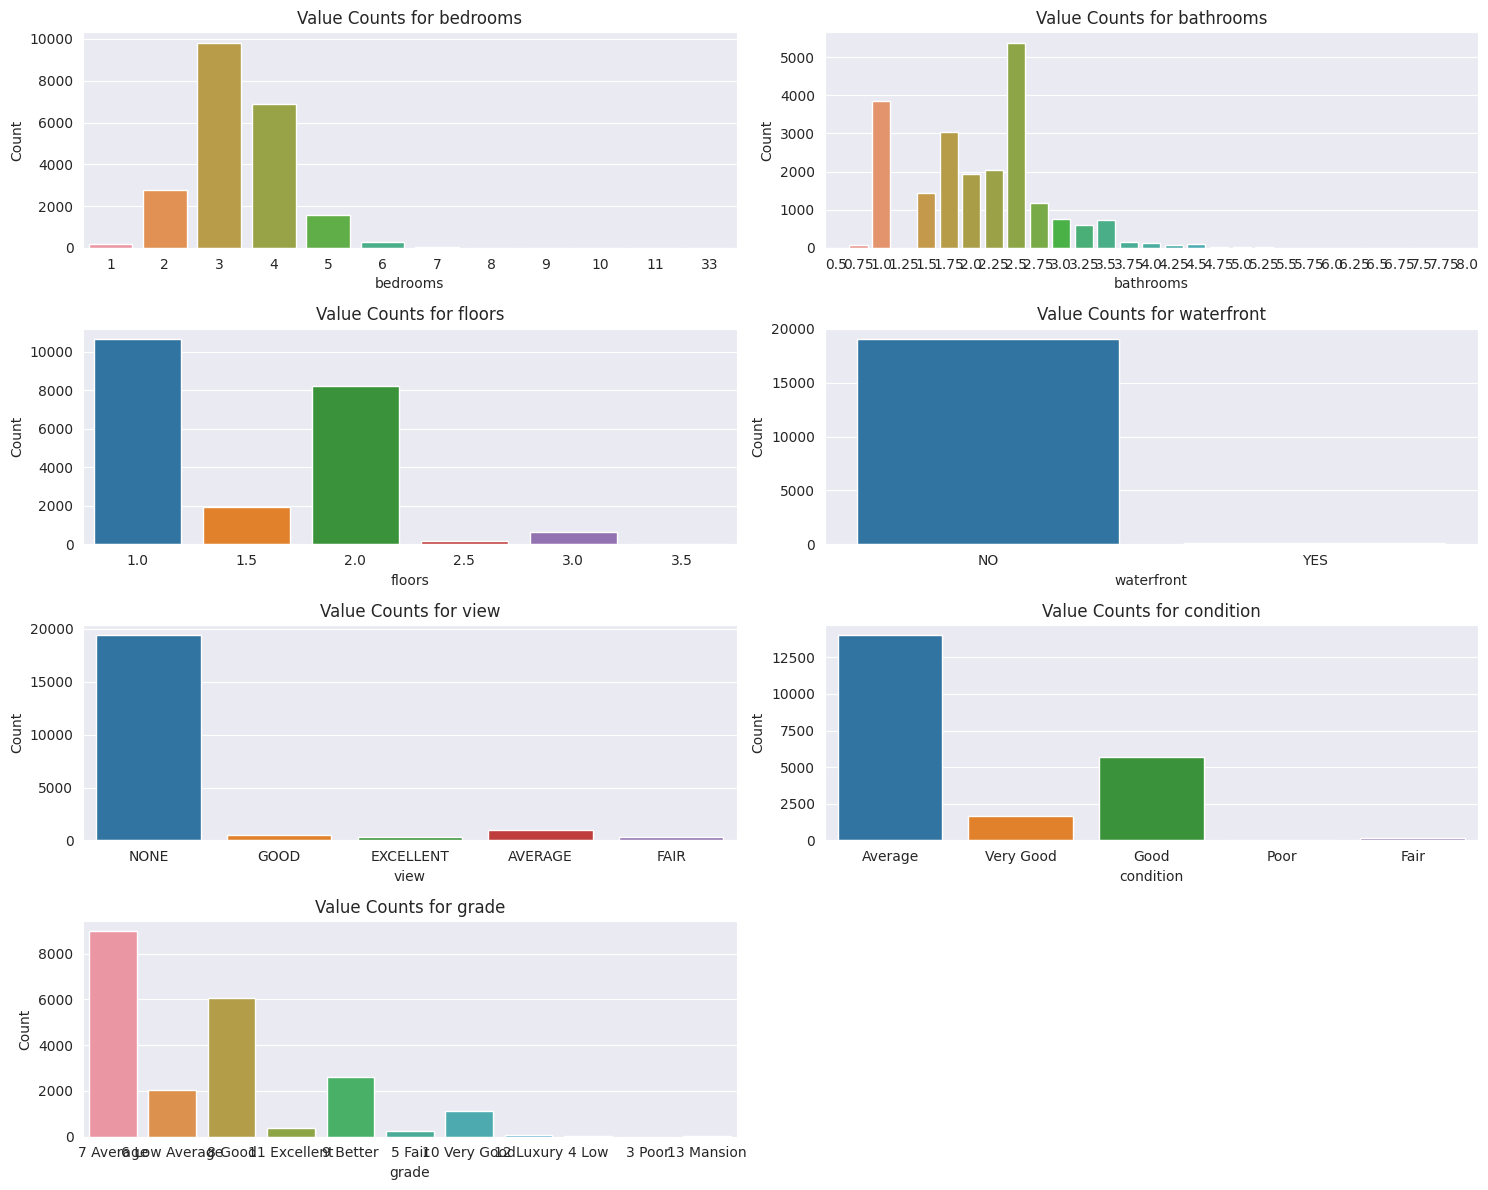

In [15]:
# plot value counts for categorical columns
plot_value_counts(df, categoricals)

#### Check the value counts while detecting value counts
The print_value_counts function is designed to provide a textual summary of the value counts for specified categorical columns in a Pandas DataFrame. Let's break down how this function works and what each part of the code does:

***Function Purpose:***
The primary purpose of this function is to help data analysts and data scientists quickly understand the distribution of categories within categorical columns. By printing value counts for each specified column, it simplifies the process of obtaining an overview of category frequencies.

***Function Parameters:***

dataframe (pd.DataFrame): This parameter expects a Pandas DataFrame containing the data to be analyzed.
columns (list): It requires a list of column names from the DataFrame. These should represent the categorical variables for which you want to print value counts.

***Function Workflow:***

Iterating Through Specified Columns: The function starts by iterating through the list of specified columns, which represent the categorical variables for analysis.

Displaying Value Counts: For each column, it prints the following information:

Value counts for '{column}':: This is a header that identifies the column name for which the value counts are being displayed.
print(dataframe[column].value_counts()): This line prints the actual value counts for the column, showing the frequency of each category in descending order (from the most frequent to the least frequent).
print("\n\n"): This double line break creates separation between the value counts for different columns, making the output more readable.

***Function Outcome:***

The end result is a series of value count summaries for each specified categorical column. Each summary includes the name of the column and the frequency of each category within that column. By providing this information, the function makes it easy to quickly grasp the distribution of categories within the dataset's categorical variables.


In [16]:
def print_value_counts(dataframe, columns):
    """
    Print the value counts for specified categorical columns in a DataFrame.
    Parameters:
    - dataframe (pd.DataFrame): The DataFrame containing the data.
    - columns (list): A list of column names to display value counts for.
    """
    for column in columns:
        print(f"Value counts for '{column}':")
        print(dataframe[column].value_counts())
        print("\n\n")

In [17]:
# print value counts for categorical columns
print_value_counts(df, categoricals)

Value counts for 'bedrooms':
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64



Value counts for 'bathrooms':
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64



Value counts for 'floors':
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64



Value counts for 'waterfront':
NO     19075
YES      146
Name: waterfront, dtype: int64



Value counts for 'view':
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: in

### 3.1.2 Handling Outliers and Missing Values

***Handling Outliers***

In the previous analysis, you encountered two important data preprocessing steps related to outliers and missing values. Let's break down each of these steps:

Handling Outliers in the Bedroom Column:

The analysis focused on the 'bedrooms' column, which represents the number of bedrooms in each house.
An outlier is a data point that significantly differs from the rest of the data, and in this case, it refers to the presence of houses with an unrealistic number of bedrooms.
The code df[df['bedrooms'] >= 11] was used to identify houses with 11 or more bedrooms.
Houses with such a high number of bedrooms are uncommon and may be considered outliers or data entry errors. To maintain data integrity and prevent these outliers from affecting the results, they were removed from the dataset using df = df[df['bedrooms'] <= 10].

Handling Missing Values in the Waterfront Column:

The analysis extended to the 'waterfront' column, which likely indicates whether a property has a waterfront view (YES), does not have a waterfront view (NO), or has a missing or unspecified value.
Missing values can affect the quality of the dataset and impact subsequent analyses. Therefore, it's essential to address them.
To handle the missing values in the 'waterfront' column, you used the code df['waterfront'] = df['waterfront'].fillna("missing").
This code replaced the missing values with the string "missing," making it clear that these properties have an unspecified waterfront status.
By addressing outliers in the 'bedrooms' column and missing values in the 'waterfront' column, you improved the dataset's quality and ensured that these issues did not negatively influence your analyses and results. It's important to handle outliers and missing values appropriately to maintain data integrity and conduct accurate data analysis.

***misssing Value***

After further evaluation of the dataset, it was noted that there were missing values in the 'view' column.

To address this, the code len(df[df['view'].isna()]) was used to check the number of missing values in the 'view' column.

Following deliberation, it was decided that the number of missing values was relatively minimal. To ensure that the missing values did not affect the analysis, the code df = df.dropna(subset=['view']) was employed to remove the rows with missing values in the 'view' column.

This decision to drop these missing values was made to maintain the integrity of the dataset and to ensure that the subsequent analyses and results were not adversely impacted by these few missing data points. Handling missing values is a common data preprocessing step to enhance the quality and reliability of the dataset for analysis.


In [18]:
# handling the Outliers in the bedroom column

df[df['bedrooms'] >= 11]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,2014-08-21,520000,11,3.00,3000,4960,2.0,NO,NONE,Average,7 Average,2400,600,1918,1999.0,98106,47.5560,-122.363,1420,4960
15856,2014-06-25,640000,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,1040,580,1947,0.0,98103,47.6878,-122.331,1330,4700


In [19]:
# drop these columns as it seem unrealistic and may sway the results
df = df[df['bedrooms'] <= 10]

In [20]:
# Fill missing values in the 'waterfront' column with the string "missing"
df['waterfront'] = df['waterfront'].fillna("missing")


<ipython-input-20-d3acec3ee3a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['waterfront'] = df['waterfront'].fillna("missing")


In [21]:
# Calculate the number of missing values in the 'view' column
len(df[df['view'].isna()])



63

In [22]:
# Drop rows with missing values in the 'view' column
df = df.dropna(subset=['view'])


## 3.2 Numerical Variables
In this section, the focus was on analyzing the continuous variables within the dataset. Continuous variables are numeric values that can take on a wide range of values. The analysis aimed to gain a deeper understanding of these variables.

To achieve this, a for loop was employed to iterate through the columns and detect issues within them. The primary issues targeted were columns containing values like 0 or any other element that is not a numeric value. These issues can affect data quality and subsequent analyses.

The for loop allowed for the identification of specific columns that exhibited such problematic values, enabling further investigation and data preprocessing if needed. Understanding the nature of continuous data and identifying any irregularities or outliers is a crucial step in the exploratory data analysis process.


### 3.2.1 Understand The Continuous Data
In this section, the goal was to understand and analyze the continuous data, which consists of numeric values that can take on a wide range of numerical values. To identify and address potential issues in the continuous variables, a set of operations was performed.

. Initialize a List to Store Columns with Issues: A list named columns_with_issues was created to keep track of columns that displayed problematic values. These values included either 0 or non-numeric entries that could negatively impact data quality and analysis.

. Iterating Through Continuous Columns: A for loop was used to iterate through the columns specified in the numerics list. For each column, the loop checked for two types of issues:

. Presence of 0 Values: It examined whether the column contained any 0 values.
Non-Numeric Values: It determined if the column contained values that were neither integers nor floating-point numbers.
Appending Columns with Issues: If the loop detected columns with either of these issues, they were added to the columns_with_issues list.

. Displaying Columns with Issues: After the loop finished, the code printed the columns with issues by iterating through the columns_with_issues list. This provided a clear view of which continuous variables had problematic values.

The purpose of this analysis was to identify columns with data quality issues and address them during the data preprocessing stage. By understanding the data quality, you can ensure that subsequent analyses are based on reliable and accurate information.


In [23]:
# Initialize a list to store columns with issues
columns_with_issues = []

for column_name in numerics:
    # Check if the column contains 0 or non-integer, non-float values
    if (df[column_name] == 0).any() or not pd.api.types.is_numeric_dtype(df[column_name]):
        columns_with_issues.append(column_name)

# Print the columns with issues
print("Columns with 0 or non-numeric values:")
for column_name in columns_with_issues:
    print(column_name)

Columns with 0 or non-numeric values:
sqft_basement
yr_renovated


#### 3.2.2 Handling Outliers and Missing Values
**Handling Issues within the 'sqft_basement' Column:**

. Converting 'sqft_basement' to Numeric: We noticed that there were some problems with the 'sqft_basement' column. To tackle this, we decided to convert the 'sqft_basement' column into a numeric format. We used the code df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce'). The reason for this 'coerce' parameter is that it helps replace any non-numeric values with NaN, signifying missing data.

. Filtering Rows with Missing Values: After making the conversion to a numeric format, we created a new DataFrame called filtered_df to hold rows where the 'sqft_basement' value was NaN, indicating missing data. We performed this filtering using the code filtered_df = df[df['sqft_basement'].isna()].

. Discussion and Decision: We engaged in an in-depth discussion to decide how to manage these missing values in the 'sqft_basement' column. After considering the options, we reached a decision. We agreed that removing these missing values was the best course of action. The rationale behind this choice was that when the 'sqft_basement' data is missing, it's likely because some houses simply don't have basements. Keeping the missing values in these cases could potentially skew our analysis results.

. Dropping Missing Values in 'sqft_basement': To put our decision into effect, we utilized the code df = df.dropna(subset=['sqft_basement']) to eliminate rows with missing values in the 'sqft_basement' column.

**Handling 'yr_renovated' Column:**

Mapping 'yr_renovated' Column: We also addressed the 'yr_renovated' column. Specifically, we replaced any NaN values with a new category, "missing." We implemented this change using the code df['yr_renovated'] = df['yr_renovated'].map(lambda x: "missing" if pd.isna(x) else x).
By carrying out these steps, we effectively resolved data quality issues in the 'sqft_basement' and 'yr_renovated' columns. This was a vital part of our data preprocessing efforts, ensuring that the dataset we work with is reliable and accurate for our future analyses.


handle the issues within the sqft_basement

In [24]:
# Converting the 'sqft_basement' to numeric so that we can identify columns with data issues
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

# Creating a DataFrame 'filtered_df' to store rows with missing values in 'sqft_basement'
filtered_df = df[df['sqft_basement'].isna()]

# Displaying a random sample of 5 rows from 'filtered_df'
filtered_df.sample(5)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8644,2015-02-19,289900,3,1.00,1180,7068,1.0,NO,NONE,Average,6 Low Average,1180,NaN,1944,NaN,98178,47.4947,-122.238,1180,7068
4677,2014-10-22,650000,4,2.00,1930,3976,1.5,NO,NONE,Good,8 Good,1930,NaN,1914,0.0,98122,47.6117,-122.297,1470,4080
11591,2014-05-28,820000,3,2.50,2510,5503,2.0,NO,AVERAGE,Average,9 Better,2510,NaN,1995,0.0,98136,47.5419,-122.383,1790,6099
4618,2014-09-23,626500,3,1.75,1610,3210,1.0,NO,NONE,Very Good,7 Average,910,NaN,1928,0.0,98103,47.6656,-122.335,1420,3210
11283,2014-07-25,671500,4,2.25,2130,8410,2.0,NO,NONE,Good,8 Good,2130,NaN,1977,0.0,98006,47.5589,-122.128,2170,8400


In [25]:
# Mapping the 'yr_renovated' column to replace NaN values with a class of 'missing'

df['yr_renovated'] = df['yr_renovated'].map(lambda x: "missing" if pd.isna(x) else x)

In [26]:
# Filtering the DataFrame to identify rows where 'sqft_basement' is NaN

df[df['sqft_basement'].isna()]


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,2014-06-27,257500,3,2.25,1715,6819,2.0,NO,NONE,Average,7 Average,1715,NaN,1995,0.0,98003,47.3097,-122.327,2238,6819
18,2014-12-05,189000,2,1.00,1200,9850,1.0,NO,NONE,Good,7 Average,1200,NaN,1921,0.0,98002,47.3089,-122.210,1060,5095
42,2014-07-07,861990,5,2.75,3595,5639,2.0,NO,NONE,Average,9 Better,3595,NaN,2014,0.0,98053,47.6848,-122.016,3625,5639
79,2015-03-23,720000,4,2.50,3450,39683,2.0,NO,NONE,Average,10 Very Good,3450,NaN,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2014-09-16,272500,3,1.75,1540,12600,1.0,NO,NONE,Good,7 Average,1160,NaN,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,2014-07-11,504600,5,3.00,2360,5000,1.0,NO,NONE,Average,7 Average,1390,NaN,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,2014-07-21,337500,4,2.50,2330,4907,2.0,NO,NONE,Average,7 Average,2330,NaN,2013,missing,98042,47.3590,-122.081,2300,3836
21473,2015-01-20,352500,2,2.50,980,1010,3.0,missing,NONE,Average,8 Good,980,NaN,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2014-10-15,332000,4,2.50,2380,5737,2.0,NO,NONE,Average,7 Average,2380,NaN,2010,0.0,98023,47.2815,-122.356,2380,5396


In [27]:
# Dropping rows with missing values in the 'sqft_basement' column
df = df.dropna(subset=['sqft_basement'])

In [28]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [29]:
# Calculate the shape of the DataFrame after conducting EDA and data preprocessing
After_EDA_shape = df.shape

# Calculate the percentage of data lost
# Calculate the difference in the number of rows (data points) between initial and post-EDA shapes
# Calculate the relative percentage of data lost by dividing the difference by the sum of the initial and post-EDA shapes
lost_data = (innitial_shape[0] - After_EDA_shape[0]) / ((innitial_shape[0] + After_EDA_shape[0])) * 100

# Print the percentage of data lost
lost_data


1.2114253579211285

The code calculates the percentage of data lost after conducting exploratory data analysis (EDA) and making necessary data preprocessing changes. Here's how it works:

. After_EDA_shape is the shape of the DataFrame df after conducting EDA and data preprocessing.
. initial_shape is the shape of the DataFrame df before any data preprocessing or EDA.

To calculate the percentage of data lost:

The difference in the number of rows (data points) between the initial shape and the shape after EDA is determined: initial_shape[0] - After_EDA_shape[0].
The relative percentage of data lost is calculated by dividing this difference by the sum of the initial shape and the shape after EDA: ((initial_shape[0] - After_EDA_shape[0]) / (initial_shape[0] + After_EDA_shape[0])) * 100.

The result, stored in the variable lost_data, represents the percentage of data that was removed or lost during EDA and data preprocessing. In your case, it appears that approximately 1.2114% of the data was lost. You've concluded that this loss is not significant and won't significantly impact the modeling process. This conclusion is often based on the understanding that the removed data points were outliers or contained missing or erroneous values that could adversely affect the analysis.

# 4 Feature Engineering

Under the section of Feature Engineering, we conducted a thoughtful analysis and introduced several new features to enhance the dataset's quality and its relevance for modeling. Here's a breakdown of what we did:

***Creating the 'age_house' Column:***

We created a new column named 'age_house' to represent the age of each house. This was achieved by subtracting the construction year from the current year, 2023. The 'date' column provided the year of construction. This new column will be valuable for understanding how the age of a house impacts its price.

***Handling the 'yr_renovated' Column:***

We recognized that the 'yr_renovated' column contained numerous 0 values, which led to data clustering. To handle this, we mapped the values as follows:
Missing values were mapped to -1.
0 values were mapped to 0.
Houses with renovation years were mapped to 1. This transformation provided a clearer representation of renovation status for each property.

***Creating the 'neighborhood' Column:***

A 'neighborhood' column was introduced by utilizing information from the 'zipcode' column and the geographical coordinates ('lat' and 'long'). By combining these data points, we created a new feature that represents neighborhood information. This can be valuable in modeling as different neighborhoods may influence property prices.

***Binning the 'age_house' Column:***

We decided to categorize the 'age_house' column into 10 bins to group houses by age. Houses in the 0-10 years range were assigned the bin label 10, while those older than 100 years were assigned the label 1. This categorization reflects the assumption that older houses may be less expensive, considering they hold less weight in terms of price. This new 'age_house' categorical variable adds a nuanced perspective on house age.

These feature engineering steps enhance the dataset by providing additional information that could be valuable in predictive modeling and understanding the factors affecting house prices.

creating relevant columns that we thought will be important in our modeling

reate an 'age_house' column that shows the age of the house by subtracting the year from the 'date' column from the current year, 2023,

In [30]:
# Define the current year as 2023
df['selling_year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month

<ipython-input-30-7b6cbc94cb5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['selling_year'] = df['date'].dt.year
<ipython-input-30-7b6cbc94cb5b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'] = df['date'].dt.quarter
<ipython-input-30-7b6cbc94cb5b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [31]:

# Apply the function to create the 'age_house' column
df['age_house'] = df['selling_year'] - df['yr_built']


<ipython-input-31-99a8b72c34ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_house'] = df['selling_year'] - df['yr_built']


In [32]:
# Define a function to map values to the 'renovated' column
def map_renovated(yr_renovated):
    """
    Map values to the 'renovated' column based on the 'yr_renovated' values.

    Parameters:
    - yr_renovated: Value representing the year of renovation, 'missing', or other data types.

    Returns:
    - int: Mapped value (1 for '0', 0 for 'missing', 2 for valid year, None for other cases).
    """
    if yr_renovated == 0:
        # Map 0 to 1 to indicate no renovation
        return 1
    elif yr_renovated == 'missing':
        # Map 'missing' to 0 to indicate missing renovation information
        return 0
    elif isinstance(yr_renovated, (int, float)):
        # Map valid years (int or float) to 2 to indicate renovation occurred
        return 2
    else:
        # For other cases, return None
        return None




In [33]:
# Apply the function to create the 'renovated' column
df['renovated'] = df['yr_renovated'].apply(map_renovated)

<ipython-input-33-53c5802fbe2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['renovated'] = df['yr_renovated'].apply(map_renovated)


In [34]:
# Group by 'zipcode' and calculate mean 'lat' and 'long' for each zip code
zipcode_info = df.groupby('zipcode')[['lat', 'long']].mean().reset_index()

X = zipcode_info[['lat', 'long']]

# Perform K-Means clustering on geographical coordinates
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

# Add the cluster labels as a new 'neighborhood' column in the zipcode_info DataFrame
zipcode_info['neighborhood'] = kmeans.labels_

# Merge 'neighborhood' information back into the original DataFrame
df = df.merge(zipcode_info[['zipcode', 'neighborhood']], on='zipcode', how='left')



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [35]:
zipcode_info.shape

(70, 4)

In [36]:
def categorize_age_house(df):


    # Define the bin edges and labels
    bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 1000]
    labels = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

    # Categorize the 'age_house' column
    df['age_hse_category'] = pd.cut(df['age_house'], bins=bins, labels=labels, include_lowest=True)
    return df

In [37]:
categorize_age_house(df)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,selling_year,quarter,month,age_house,renovated,neighborhood,age_hse_category
0,2014-10-13,221900,3,1.00,1180,5650,1.0,missing,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,4,10,59,1,9,5
1,2014-12-09,538000,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,4,12,63,2,1,4
2,2015-02-25,180000,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,missing,98028,47.7379,-122.233,2720,8062,2015,1,2,82,0,3,2
3,2014-12-09,604000,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,4,12,49,1,8,6
4,2015-02-18,510000,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,1,2,28,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21075,2014-05-21,360000,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2014,2,5,5,1,1,10
21076,2015-02-23,400000,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2015,1,2,1,1,8,10
21077,2014-06-23,402101,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2014,2,6,5,1,1,10
21078,2015-01-16,400000,3,2.50,1600,2388,2.0,missing,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,2015,1,1,11,1,0,9


In [38]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,selling_year,quarter,month,age_house,renovated,neighborhood,age_hse_category
0,2014-10-13,221900,3,1.00,1180,5650,1.0,missing,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,4,10,59,1,9,5
1,2014-12-09,538000,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,4,12,63,2,1,4
2,2015-02-25,180000,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,missing,98028,47.7379,-122.233,2720,8062,2015,1,2,82,0,3,2
3,2014-12-09,604000,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,4,12,49,1,8,6
4,2015-02-18,510000,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,1,2,28,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21075,2014-05-21,360000,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2014,2,5,5,1,1,10
21076,2015-02-23,400000,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2015,1,2,1,1,8,10
21077,2014-06-23,402101,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2014,2,6,5,1,1,10
21078,2015-01-16,400000,3,2.50,1600,2388,2.0,missing,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,2015,1,1,11,1,0,9


### 4.1 Updates the Afters EDA and Feature engineering columns

In the section titled "4.1 Updates the Afters EDA and Feature Engineering Columns," several updates were made to the dataset:

***'lat,' 'long,' 'zipcode' Columns:***

The 'lat,' 'long,' and 'zipcode' columns were no longer included in the dataset. We made this decision because we had already used the information from these columns to create the 'neighborhood' column. Therefore, keeping these columns separately was redundant, and we aimed to streamline the dataset for modeling purposes.

***'yr_built' Column:***

The 'yr_built' column was also excluded from the dataset. The reason for this removal is that we needed to calculate the age of the house using the 'date' column, and the 'yr_built' column was no longer required separately.

***Dropped 'yr_renovated' Column:***

We chose to drop the 'yr_renovated' column as well. Instead, we created a new column called 'renovated' to represent whether a house is missing renovation information, has been renovated, or has not been renovated. This transformation allowed us to provide a more meaningful representation of the renovation status while keeping the dataset concise.
These updates were made to enhance the dataset's relevance and efficiency for modeling. By removing redundant columns and adding new features that better represent the required information, we aimed to create a more effective dataset for subsequent analyses and modeling.

In [39]:
# list of columns containing numerical data
numerics = ['price', 'sqft_lot', 'sqft_lot15', 'sqft_living', 'sqft_living15', 'sqft_above', 'sqft_basement']

# list of columns containing categorical data
categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'neighborhood', 'renovated', 'age_house_category']


### 4.2 Mapping the label Features

In the section titled "4.2 Mapping the Label Features," we conducted a series of mappings and transformations on several columns to make the data more suitable for modeling. Here's an explanation of each of the mappings:

***Mapping the 'view' Feature:***

We intentionally assigned labels to the 'view' feature based on our observation that houses with excellent views tend to cost more. The labels and their corresponding impact criteria are as follows:
'NONE': 0
'FAIR': 1
'AVERAGE': 2
'GOOD': 3
'EXCELLENT': 4
We mapped the values from 0 to 4 to represent the impact of the view on house prices, with a higher number indicating a more positive impact.

***Mapping the 'grade' Column:***

To map the 'grade' column, we split the elements within the column and obtained the corresponding numeric values for each instance. This transformation allows us to numerically represent the quality or grade of a house.

***Mapping the 'condition' Column:***

The 'condition' column was mapped based on an analogy, with labels and numeric values assigned as follows:
'Poor': 1
'Fair': 2
'Average': 3
'Good': 4
'Very Good': 5
These numeric values represent the condition of a house, with a higher number indicating a better condition.

***Mapping the 'waterfront' Column:***

The 'waterfront' column was mapped to convert its values into numeric categories. We assigned the following labels and numeric values:
'missing': 0
'NO': 1
'YES': 2

***One-Hot Encoding for the 'neighborhood' Column:***

We used one-hot encoding for the 'neighborhood' column, which contains nominal data. This approach was chosen to avoid introducing bias into the model. One-hot encoding transforms categorical data into binary values, with separate columns created for each category.
The main reason for one-hot encoding the 'neighborhood' column was to ensure that the data remains ordinal. By using one-hot encoding, we maintain the distinct categories as separate binary columns, which helps prevent the model from assuming ordinal relationships between the categories.
These mappings and transformations were performed to make the data more amenable to modeling and to ensure that it accurately represents the factors that influence house prices. Each mapping was based on specific criteria and observations to reflect the underlying patterns in the data.


In [40]:
# Define the mapping for the 'view' column
view_mapping = {
    'NONE': 0,
    'AVERAGE': 2,
    'GOOD': 3,
    'FAIR': 1,
    'EXCELLENT': 4
}

# Map the 'view' column using the defined mapping
df['view'] = df['view'].map(view_mapping)

In [41]:
df['view'].isna().sum()

0

In [42]:
# Split the 'grade' column by space and use the first element
df['gradings'] = df['grade'].str.split().apply(lambda x: x[0]).astype(int)

In [43]:
# Define a mapping dictionary for the 'condition' column
condition_mapping = {
    'Poor': 1,
    'Fair': 2,
    'Average': 3,
    'Good': 4,
    'Very Good': 5
}

# Use the mapping to transform the 'condition' column to numeric values
df['house_condition'] = df['condition'].replace(condition_mapping).astype(int)


In [44]:
# # # Define a mapping dictionary for the 'waterfront' column
# # waterfront_mapping = {'missing': 0, 'NO': 1, 'YES': 2}

# # # Use the mapping to transform the 'waterfront' column to numeric values
# #df['waterfronts'] = df['waterfront'].map(waterfront_mapping)
# X = df[numerics].drop(columns='price', axis=1)
# y = df['price']
# X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scale  = RobustScaler()
# x_scaler = scale.fit_transform(X_train)
# x_test_scaler = scale.transform(X_test)
# model2 = LinearRegression()
# y_p = model2.fit(x_scaler, y_train)
# y_pred = model2.predict(x_test_scaler)

# mse = mean_squared_error(y_test,y_pred)
# r2 = r2_score(y_test, y_pred)
# rmse = np.sqrt(r2)
# print(f"Mean Squared Error: {mse}")
# print(f"R-squared (R2) Score: {r2}")
# print(f"R-squared (R2) Score: {rmse}")


<Axes: xlabel='lat', ylabel='long'>

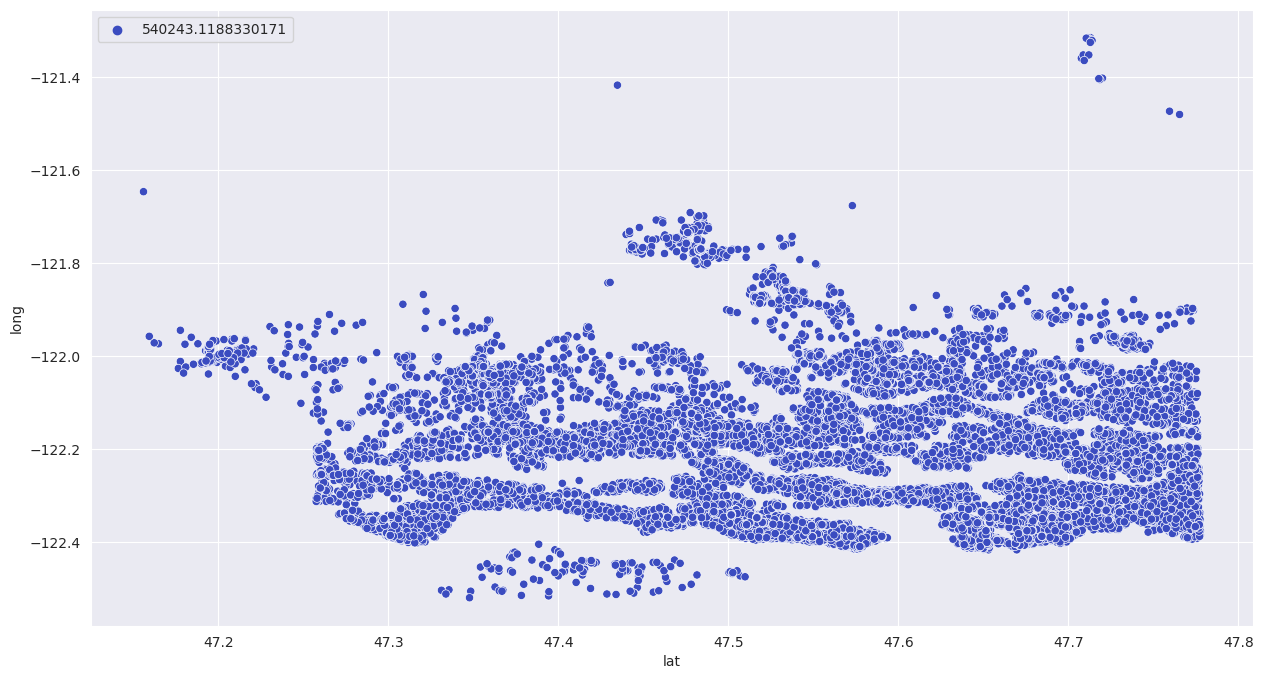

In [45]:
plt.figure(figsize=(15,8))
maps = df['price'].mean()
sns.scatterplot(data=df, x='lat', y='long', hue=maps, palette='coolwarm')

In [46]:
# # Use one-hot encoding to transform the 'neighborhood' column into binary columns
# # Each binary column represents a specific neighborhood
# # The 'drop_first=True' argument is used to drop one column to avoid multicollinearity
df = pd.get_dummies(df, columns=['neighborhood'], prefix='neighborhood', drop_first=True)


In [47]:
# # df.info()
# zipcode_info


## 4.3 Correlation Matrix for Numerical Features
In section 4.3, titled "Correlation Matrix for Numerical Features," we conducted an analysis to understand the relationships between the numerical features in our dataset, especially in relation to the target variable 'price.' Here's an explanation of what we did:

***Correlation Heatmap Visualization:***

We created a heatmap to visually represent the correlations between the numerical features. Here's a breakdown of the steps:

plt.figure(figsize=(12, 8)): We specified the size of the figure to ensure the heatmap is visually clear and informative.
sns.heatmap(df[numerics].corr(), annot=True, cmap='Spectral', linewidths=0.5, fmt=".2f"): We used the Seaborn library to generate a heatmap. The df[numerics].corr() part calculates the correlation matrix for numerical features. The annot=True argument adds numeric values within the heatmap cells, showing the strength of the correlation. We chose the 'Spectral' color map for better visualization, and linewidths specified the width of the lines between cells. The fmt=".2f" formats the annotation values to two decimal places.
plt.title('Correlation Heatmap', fontsize=15): We added a title to the heatmap for clarity.
plt.show(): Finally, we displayed the heatmap for analysis. The heatmap provides insights into which features are strongly correlated with each other and, more importantly, their correlation with the 'price' feature.

***Correlation with 'price':***

In this section, we calculated and examined the correlation coefficients between the numerical features and the target variable 'price.' Specifically, the code snippet df[numerics].corr()['price'] provides a series of correlation coefficients between each numerical feature and 'price.' This allows us to understand which features have the strongest positive or negative correlation with the target variable, which is essential for feature selection and model building.

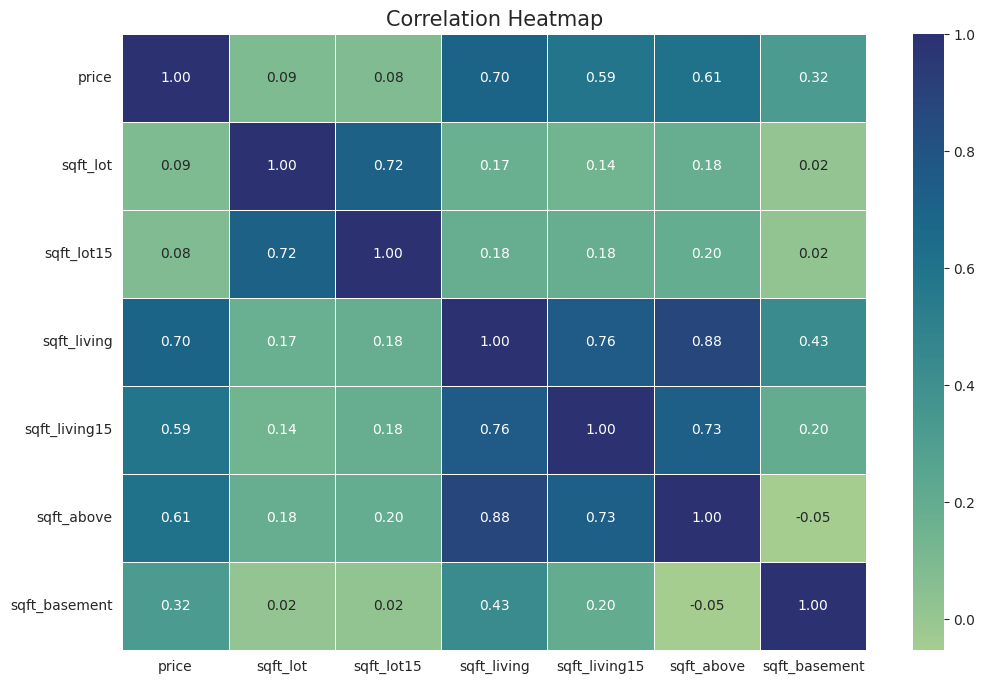

In [48]:
# Create a figure for the heatmap and specify its size
plt.figure(figsize=(12, 8))

# Generate a heatmap of the correlation matrix for numerical features
# - 'df[numerics].corr()': Calculate the correlation matrix for numerical features.
# - 'annot=True': Add numeric values as annotations within the heatmap cells.
# - 'cmap='Spectral'': Use the 'Spectral' color map for better visualization.
# - 'linewidths=0.5': Set the width of lines between cells in the heatmap.
# - 'fmt=".2f"': Format annotation values to two decimal places.
sns.heatmap(df[numerics].corr(), annot=True, cmap="crest", linewidths=0.5, fmt=".2f")

# Add a title to the heatmap for clarity
plt.title('Correlation Heatmap', fontsize=15)

# Display the heatmap
plt.show()


In [49]:
# # Create a figure for the heatmap and specify its size
# plt.figure(figsize=(12, 8))

# # Generate a heatmap of the correlation matrix for numerical features
# # - 'df[numerics].corr()': Calculate the correlation matrix for numerical features.
# # - 'annot=True': Add numeric values as annotations within the heatmap cells.
# # - 'cmap='Spectral'': Use the 'Spectral' color map for better visualization.
# # - 'linewidths=0.5': Set the width of lines between cells in the heatmap.
# # - 'fmt=".2f"': Format annotation values to two decimal places.
# sns.heatmap(df[categoricals].corr(), annot=True, cmap="crest", linewidths=0.5, fmt=".2f")

# # Add a title to the heatmap for clarity
# plt.title('Correlation Heatmap', fontsize=15)

# # Display the heatmap
# plt.show()


In [50]:
# Extract the correlation values between 'price' and other numerical features

df[numerics].corr()['price']

price            1.000000
sqft_lot         0.088402
sqft_lot15       0.083534
sqft_living      0.702035
sqft_living15    0.586528
sqft_above       0.605516
sqft_basement    0.323019
Name: price, dtype: float64

In [51]:
df.corr()['price']

<ipython-input-51-cbe57b8e6d9c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


price              1.000000
bedrooms           0.316381
bathrooms          0.525058
sqft_living        0.702035
sqft_lot           0.088402
floors             0.256628
view               0.397182
sqft_above         0.605516
sqft_basement      0.323019
yr_built           0.054861
zipcode           -0.053434
lat                0.307662
long               0.022521
sqft_living15      0.586528
sqft_lot15         0.083534
selling_year       0.004431
quarter           -0.008623
month             -0.009986
age_house         -0.054786
renovated          0.050397
gradings           0.668116
house_condition    0.034585
neighborhood_1     0.134440
neighborhood_2    -0.167855
neighborhood_3     0.066357
neighborhood_4    -0.203993
neighborhood_5    -0.022844
neighborhood_6    -0.103535
neighborhood_7     0.356926
neighborhood_8    -0.126814
neighborhood_9    -0.146371
Name: price, dtype: float64

In [52]:
# cols = ['neighborhood_1','neighborhood_2','neighborhood_3','neighborhood_3',
#         'neighborhood_4','neighborhood_5','neighborhood_6','neighborhood_7','neighborhood_8','neighborhood_9']
# df[cols].corr()['price']

# 5 Univariate Analysis And Bi-variate Analysis

In the section titled "5 Univariate Analysis And Bi-variate Analysis," we performed exploratory data analysis (EDA) and visualization of the dataset. Here's a summary of what we did:

. ***Created a Function for Univariate and Bivariate Analysis***: We defined a custom Python function named num_combined_plot for conducting both univariate and bivariate analysis of numerical features. This function takes three parameters: the dataset (data), the feature for which we want to analyze the distribution (x), and the target variable (y). The function produces a pair of plots, including a histogram with a KDE plot for the feature's distribution and a scatterplot with a regression line to understand its relationship with the target variable.

. ***Univariate Analysis***: In the left subplot generated by the num_combined_plot function, we examined the distribution of a specified numerical feature (x). This provided insights into the feature's range, central tendency, and its shape of distribution. The KDE plot added a smoothed representation of the distribution.

. ***Bivariate Analysis***: In the right subplot, we explored the relationship between the same numerical feature (x) and the target variable (y). The scatterplot displayed data points and a regression line that indicated the nature of the relationship. Additionally, the correlation coefficient between the two variables was calculated and annotated on the plot, providing insights into the strength and direction of the relationship.

. ***Aesthetics and Annotations***: We adjusted the aesthetics of the plots for a cleaner appearance. For the scatterplot, we annotated the correlation coefficient, providing a quantitative measure of the relationship.

Overall, this section allowed us to visually inspect the relationships between numerical features and the target variable, gaining valuable insights into the dataset's characteristics and potential patterns. The num_combined_plot function facilitated this analysis by providing a standardized way to visualize and assess these relationships.

## 5.1 Creating Function - Numeric Combined Plot
The num_combined_plot function is designed to create a pair of plots, which are essential for both univariate and bivariate analysis of numerical features in a dataset. Let's break down how this function works:

***Function Parameters:***

data: The dataset containing the relevant features.
x: The name of the numerical feature we want to analyze.
y: The name of the target variable, typically used for bivariate analysis.

***Subplots Creation: ***

The function starts by initializing a Matplotlib figure with two subplots side by side. The fig, axes = plt.subplots(1, 2, figsize=(15, 6)) line creates a single row of subplots, where the first subplot (index 0) is used for the histogram and the second subplot (index 1) for the scatterplot.

***Univariate Analysis - Left Subplot:***

The left subplot is dedicated to univariate analysis. It shows the distribution of the numerical feature x. The sns.histplot function plots a histogram of the feature's values, and the kde=True parameter adds a Kernel Density Estimate (KDE) plot for a smoothed representation of the distribution.
The subplot is colored with 'coral', and axis labels and a title are set accordingly.

***Bivariate Analysis - Right Subplot:***

The right subplot is used for bivariate analysis, exploring the relationship between feature x and the target variable y. The sns.regplot function creates a scatterplot of x against y and overlays a regression line that illustrates the relationship. Additional parameters control the color of the scatterplot points and the regression line.
The code calculates the correlation coefficient between the feature x and the target y and annotates this coefficient on the scatterplot for reference.
The subplot's aesthetics, such as labels and titles, are adjusted.

***Final Touches:***

The sns.despine function removes the top and right spines, giving the plots a cleaner appearance.
The axes[1].yaxis.set_label_position("right") and axes[1].yaxis.tick_right() commands move the y-axis of the scatterplot to the right side for better alignment.

***Displaying the Plots: ***

The function concludes by displaying both subplots using plt.show().
In summary, this function provides a convenient way to visualize the distribution and relationships of numerical features in a dataset. It's particularly useful for gaining insights into the characteristics and patterns of these features and their interactions with a target variable.

In [53]:
def num_combined_plot(data, x, y):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Plot the histogram with KDE
    sns.histplot(data=data, x=x, kde=True, ax=axes[0], color='coral')

    # Plot the scatterplot with a correlation line
    sns.regplot(data=data, x=x, y=y, ax=axes[1], color='teal',
                scatter_kws={'edgecolor': 'white'}, line_kws={"color": "coral"})

    # Calculate the correlation coefficient
    corr_coeff = data[[x, y]].corr().iloc[0, 1]

    # Annotate the correlation coefficient on the scatter plot
    axes[1].annotate(f'Correlation : {corr_coeff:.2f}', xy=(0.65, 0.9), xycoords='axes fraction', fontsize=14, color='coral')

    # Adjust plot aesthetics
    sns.despine(bottom=True, left=True)
    axes[0].set(xlabel=f'{x}', ylabel='Frequency', title=f'{x} Distribution')
    axes[1].set(xlabel=f'{x}', ylabel=f'{y}', title=f'{x} vs {y}')
    axes[1].yaxis.set_label_position("right")
    axes[1].yaxis.tick_right()

    plt.show()

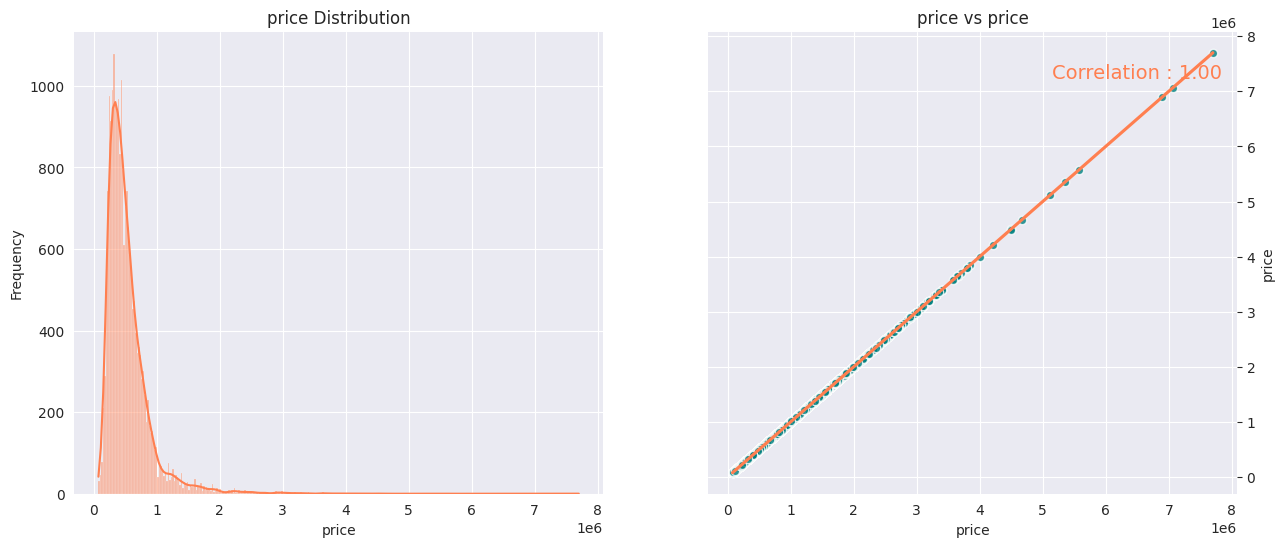

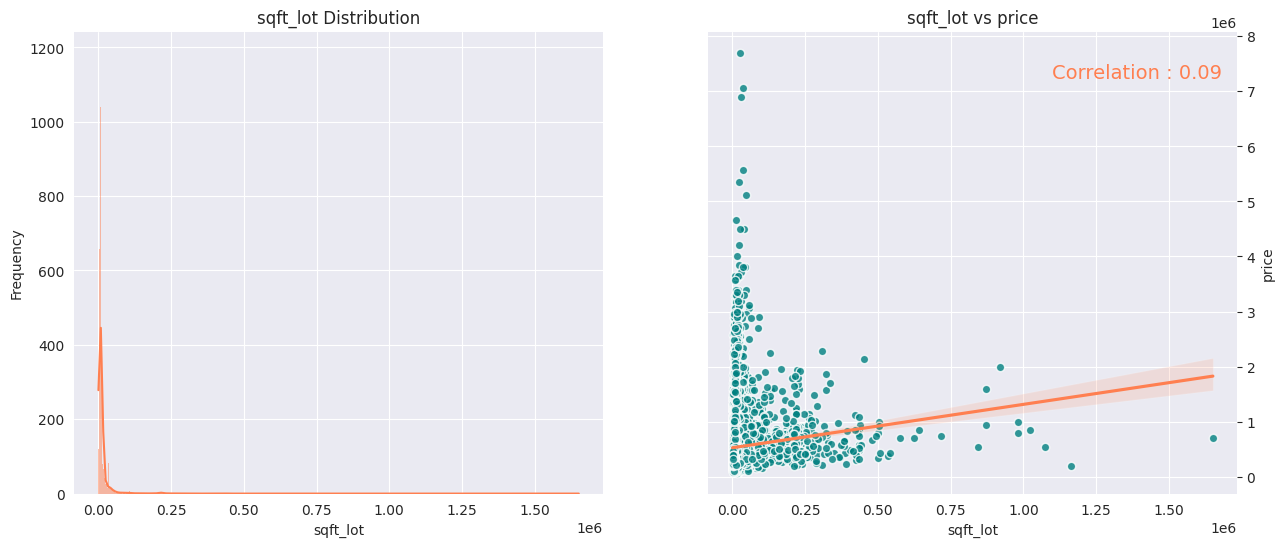

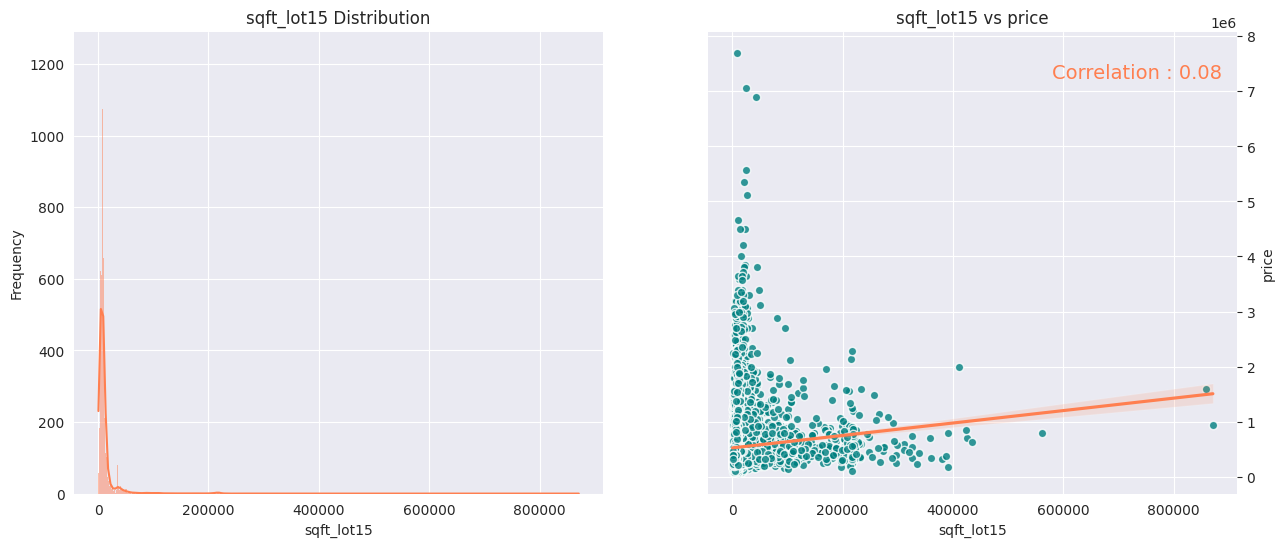

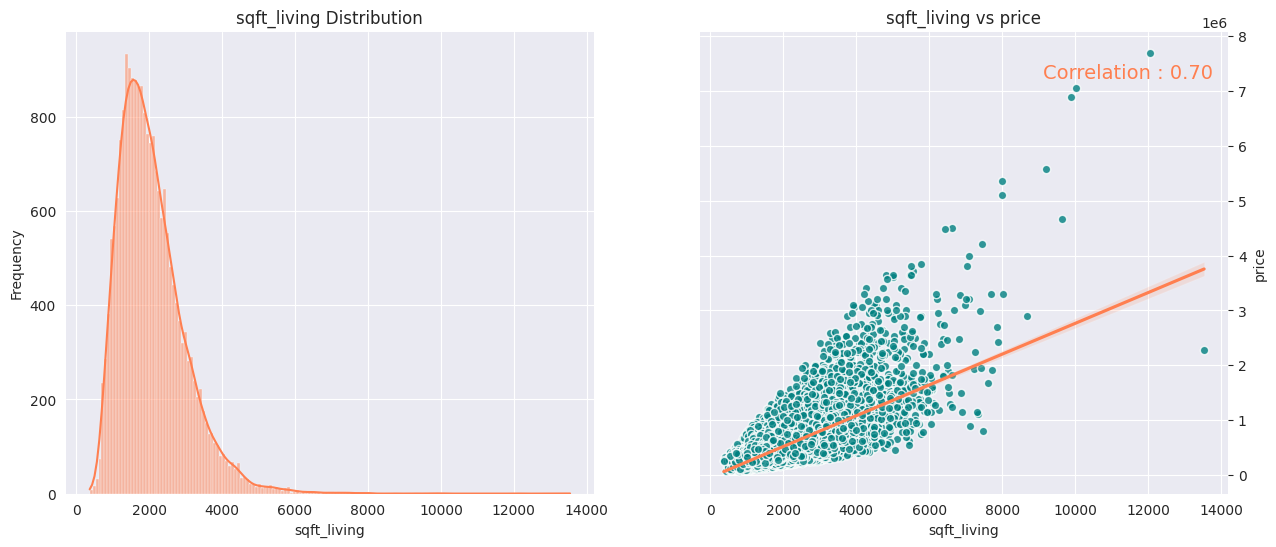

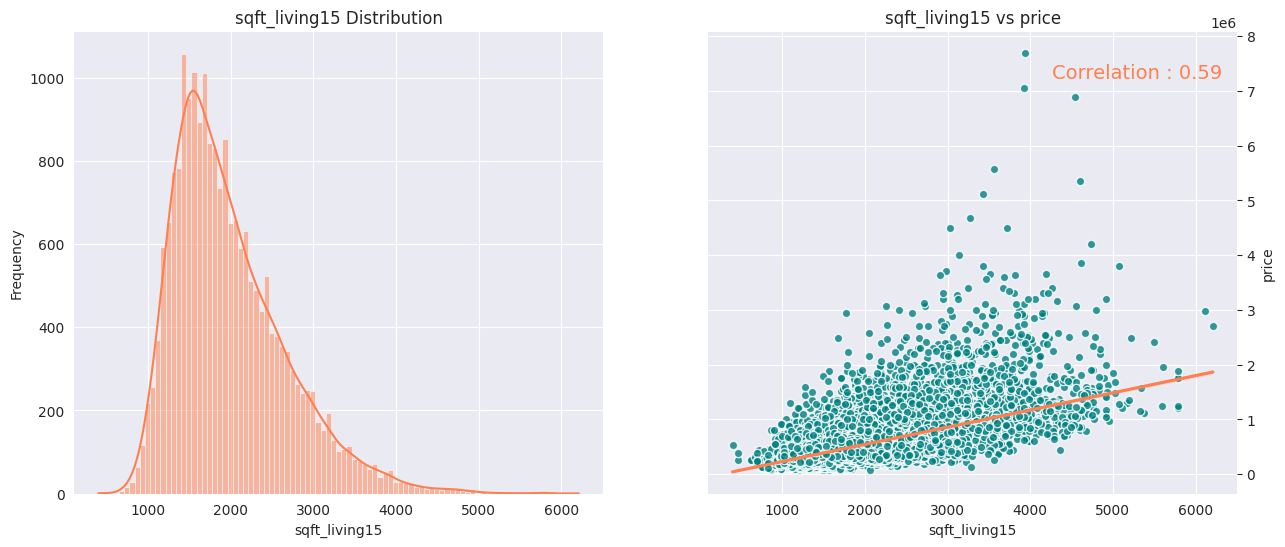

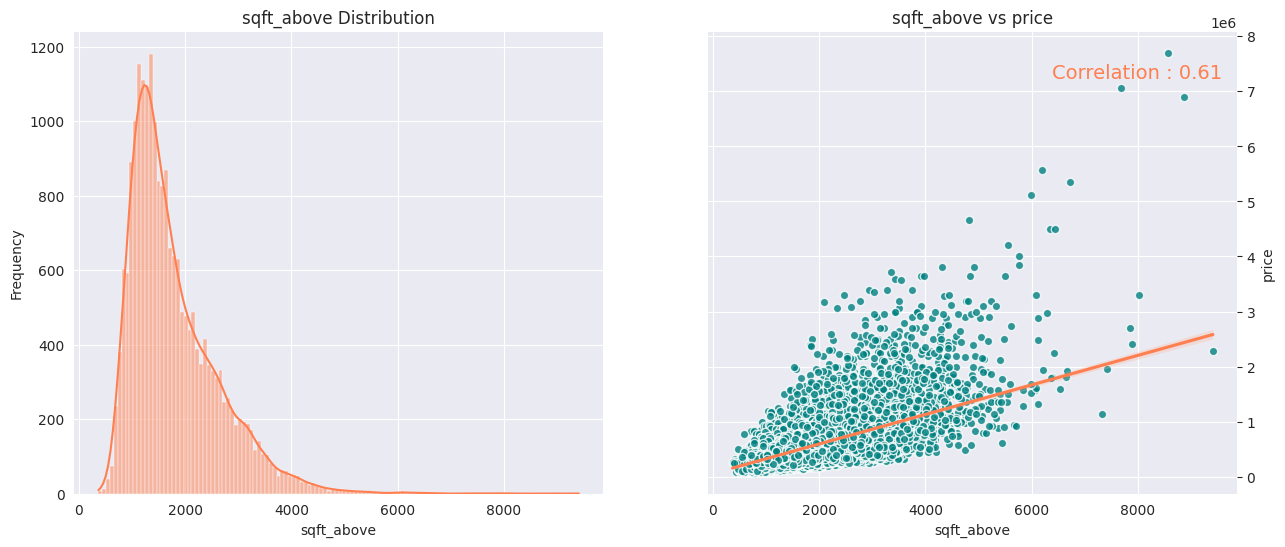

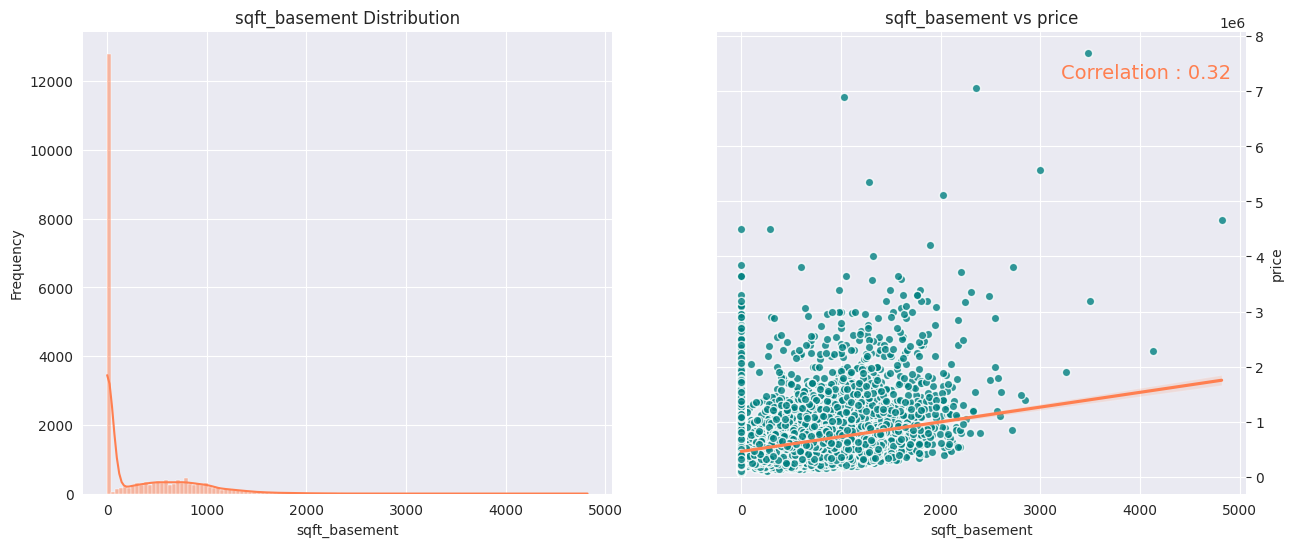

In [54]:
# plotting
for num in numerics:
    num_combined_plot(df, num, 'price')

<Axes: >

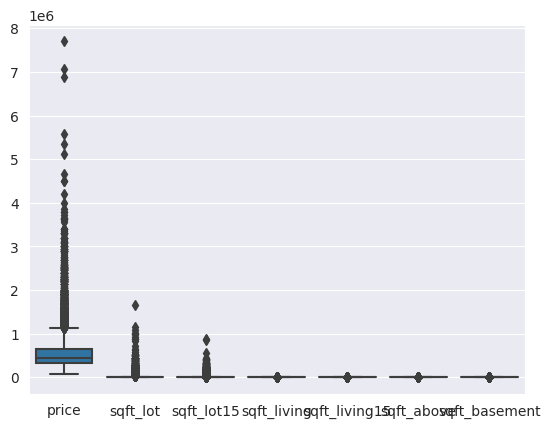

In [55]:
sns.boxplot(df[numerics])

In [56]:
# upper_lim = df[numerics].mean() + 3*df[numerics].std()
# lower_lim = df[numerics].mean() + 3*df[numerics].std()

# df.loc[df[numerics] > upper_lim]

df['sqft_above'].min()

370

In [57]:

bins = [df['sqft_lot15'].min() - 1, 1900, 3400, 4900, df['sqft_lot15'].max() + 1]

# Categorize the 'sqft_lot15' column with the specified bins and labels
df['sqft_lot15_category'] = pd.cut(df['sqft_lot15'], bins=bins, include_lowest=True)

df['sqft_lot15_category'] = df['sqft_lot15_category'].cat.codes

In [58]:

bins = [df['sqft_living'].min() - 1, 3000, 6000, 9000, df['sqft_living'].max() + 1]

# Categorize the 'sqft_lot15' column with the specified bins and labels
df['sqft_living_cat'] = pd.cut(df['sqft_living'], bins=bins, include_lowest=True)

df['sqft_living_cat'] = df['sqft_living_cat'].cat.codes

In [59]:

bins = [df['sqft_living15'].min() - 1, 1800, 3300, 4800, df['sqft_living15'].max() + 1]

# Categorize the 'sqft_lot15' column with the specified bins and labels
df['sqft_living15_cat'] = pd.cut(df['sqft_living15'], bins=bins, include_lowest=True)

df['sqft_living15_cat'] = df['sqft_living15_cat'].cat.codes

In [60]:

bins = [df['sqft_above'].min() - 1, 2000, 4000, 6000, df['sqft_above'].max() + 1]

# Categorize the 'sqft_lot15' column with the specified bins and labels
df['sqft_above_cat'] = pd.cut(df['sqft_above'], bins=bins, include_lowest=True)

df['sqft_above_cat'] = df['sqft_above_cat'].cat.codes

In [61]:
df = pd.get_dummies(df, columns=['sqft_living_cat'], prefix='sqft', drop_first=True)
df = pd.get_dummies(df, columns=['sqft_living15_cat'], prefix='living15', drop_first=True)


In [62]:
# df = pd.get_dummies(df, columns=['sqft_living15_cat'], prefix='living15', drop_first=True)

In [63]:
df.corr()['price'].sort_values()

<ipython-input-63-78b4f396fb2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


neighborhood_4        -0.203993
neighborhood_2        -0.167855
neighborhood_9        -0.146371
neighborhood_8        -0.126814
neighborhood_6        -0.103535
age_house             -0.054786
zipcode               -0.053434
neighborhood_5        -0.022844
month                 -0.009986
quarter               -0.008623
selling_year           0.004431
long                   0.022521
house_condition        0.034585
renovated              0.050397
yr_built               0.054861
sqft_lot15_category    0.056564
neighborhood_3         0.066357
sqft_lot15             0.083534
sqft_lot               0.088402
neighborhood_1         0.134440
living15_3             0.140541
living15_1             0.181782
sqft_3                 0.237166
floors                 0.256628
sqft_2                 0.261286
lat                    0.307662
bedrooms               0.316381
sqft_basement          0.323019
neighborhood_7         0.356926
view                   0.397182
living15_2             0.425252
sqft_1  

## <ins>6. Multivariate Analysis </ins>
In the section on Multivariate Analysis, two scatterplots were created to explore the relationships between multiple variables. Let's describe what each plot represents:

***Plot 1: Scatter Plot of Price vs. Living Space by Grade***

plt.figure(figsize=(15, 7)) initializes a Matplotlib figure with a specific size for the plot.
sns.scatterplot is used to create the scatterplot. The x-axis represents 'sqft_living' (living space in square feet), and the y-axis represents 'price' (house price).
The points on the scatterplot are color-coded by the 'grade' of the house, with different colors representing different grades. The 'palette' parameter specifies the color palette to use for the grade categories.
Axis labels and a title are added to the plot, specifying what each axis represents and providing a descriptive title.
A legend is included to explain the color-coding of points according to the 'grade' variable. The 'title' parameter sets the legend title, and 'fontsize' adjusts the font size.
Finally, plt.show() displays the scatterplot.

***Plot 2: Scatter Plot of Price vs. Living Space by Number of Bathrooms***

Similar to the first plot, a new figure is created with plt.figure(figsize=(15, 7)).
This scatterplot, created using sns.scatterplot, also has 'sqft_living' on the x-axis and 'price' on the y-axis.
In this plot, the points are color-coded by the number of 'bathrooms' in the house, with different colors representing different bathroom counts.
As with the first plot, axis labels, a title, and a legend are included to enhance the plot's readability and interpretability.
plt.show() is used to display the second scatterplot.
These scatterplots allow for the visual exploration of relationships between living space, price, and other relevant variables (grade and number of bathrooms) in the dataset. The color-coding of points by grade and bathroom count helps to identify patterns and trends in the data, providing valuable insights into how these variables might impact house prices.

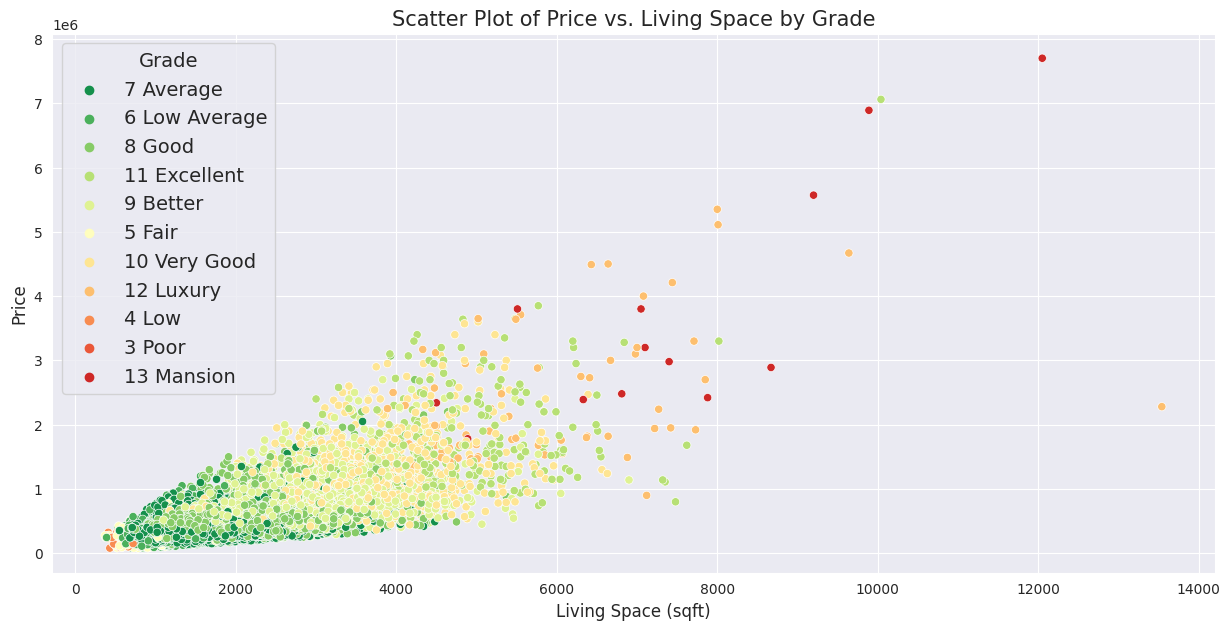

In [64]:
# Create a figure with specified size
plt.figure(figsize=(15, 7))

# Create a scatterplot using Seaborn
sns.scatterplot(data=df, x='sqft_living', y='price', hue='grade', palette='RdYlGn_r')

# Set the x-axis label
plt.xlabel('Living Space (sqft)', fontsize=12)

# Set the y-axis label
plt.ylabel('Price', fontsize=12)

# Set the title for the plot
plt.title('Scatter Plot of Price vs. Living Space by Grade', fontsize=15)

# Add a legend with a title
plt.legend(title='Grade', fontsize=14, title_fontsize=14)

# Display the plot
plt.show()


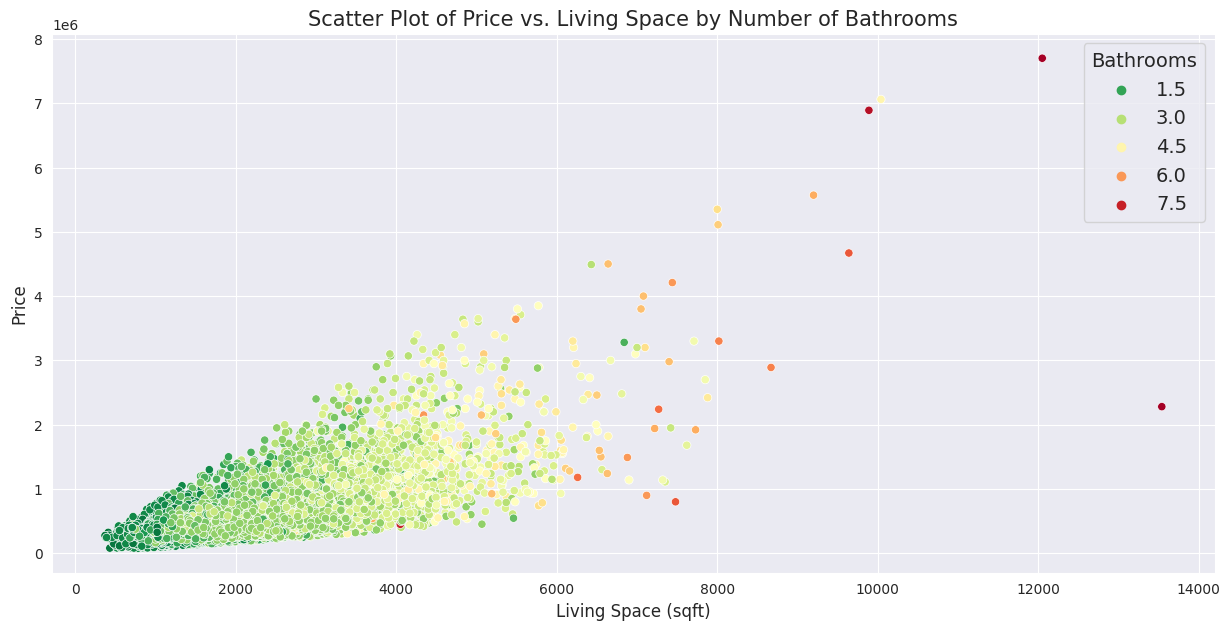

In [65]:
# Create a figure with specified size
plt.figure(figsize=(15, 7))

# Create a scatterplot using Seaborn
sns.scatterplot(data=df, x='sqft_living', y='price', hue='bathrooms', palette='RdYlGn_r')

# Set the x-axis label
plt.xlabel('Living Space (sqft)', fontsize=12)

# Set the y-axis label
plt.ylabel('Price', fontsize=12)

# Set the title for the plot
plt.title('Scatter Plot of Price vs. Living Space by Number of Bathrooms', fontsize=15)

# Add a legend with a title
plt.legend(title='Bathrooms', fontsize=14, title_fontsize=14)

# Display the plot
plt.show()


In [66]:
# list of columns containing numerical data
numerics = ['price', 'sqft_lot', 'sqft_lot15', 'sqft_living', 'sqft_living15', 'sqft_above', 'sqft_basement']

# list of columns containing categorical data
categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'neighborhood', 'renovated', 'age_house_category']

<ipython-input-67-c55001f7966d>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='sqft_living', y='price', palette='RdYlGn_r')


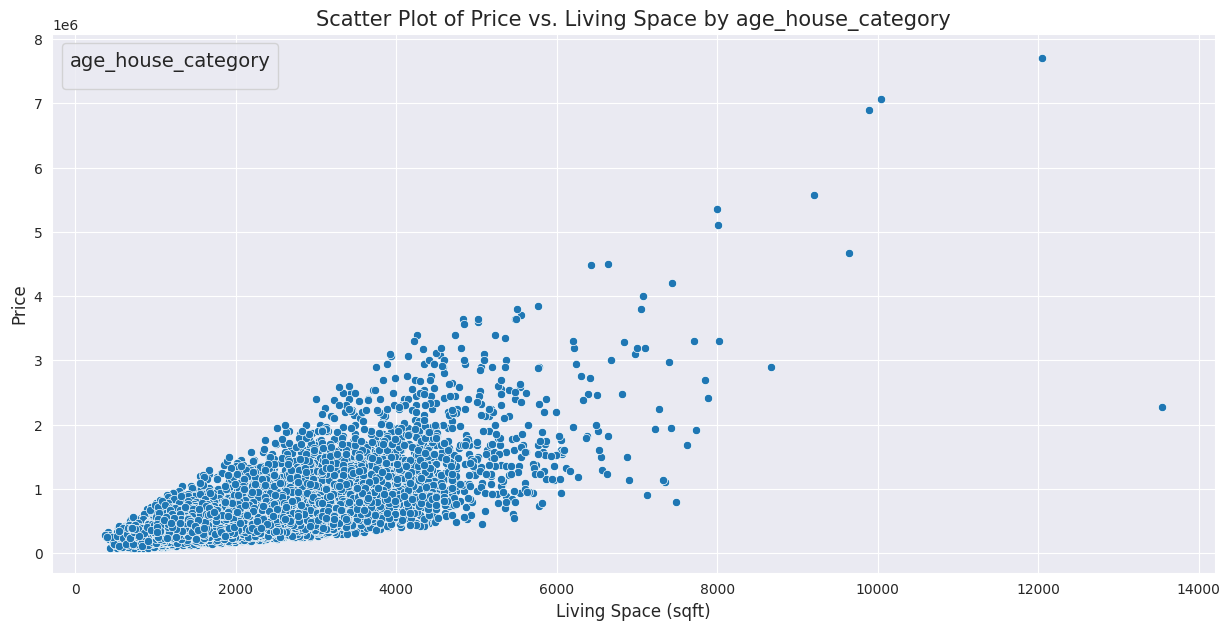

In [67]:
# Create a figure with specified size
plt.figure(figsize=(15, 7))

# Create a scatterplot using Seaborn
sns.scatterplot(data=df, x='sqft_living', y='price', palette='RdYlGn_r')

# Set the x-axis label
plt.xlabel('Living Space (sqft)', fontsize=12)

# Set the y-axis label
plt.ylabel('Price', fontsize=12)

# Set the title for the plot
plt.title('Scatter Plot of Price vs. Living Space by age_house_category', fontsize=15)

# Add a legend with a title
plt.legend(title='age_house_category', fontsize=14, title_fontsize=14)

# Display the plot
plt.show()


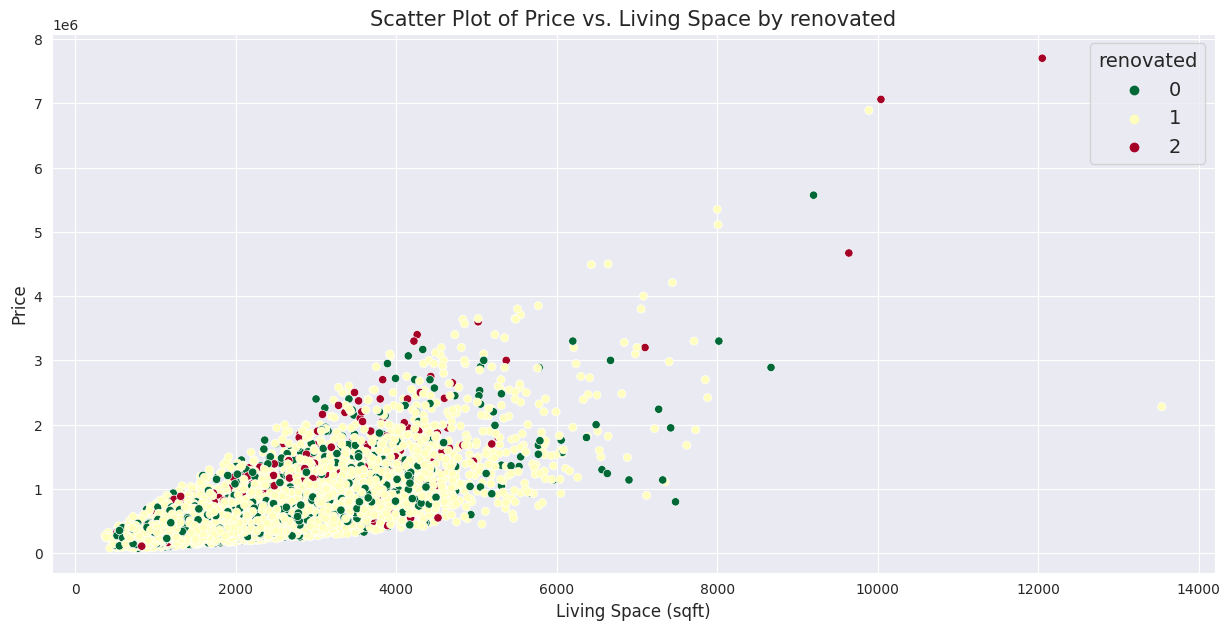

In [68]:
# Create a figure with specified size
plt.figure(figsize=(15, 7))

# Create a scatterplot using Seaborn
sns.scatterplot(data=df, x='sqft_living', y='price', hue='renovated', palette='RdYlGn_r')

# Set the x-axis label
plt.xlabel('Living Space (sqft)', fontsize=12)

# Set the y-axis label
plt.ylabel('Price', fontsize=12)

# Set the title for the plot
plt.title('Scatter Plot of Price vs. Living Space by renovated', fontsize=15)

# Add a legend with a title
plt.legend(title='renovated', fontsize=14, title_fontsize=14)

# Display the plot
plt.show()

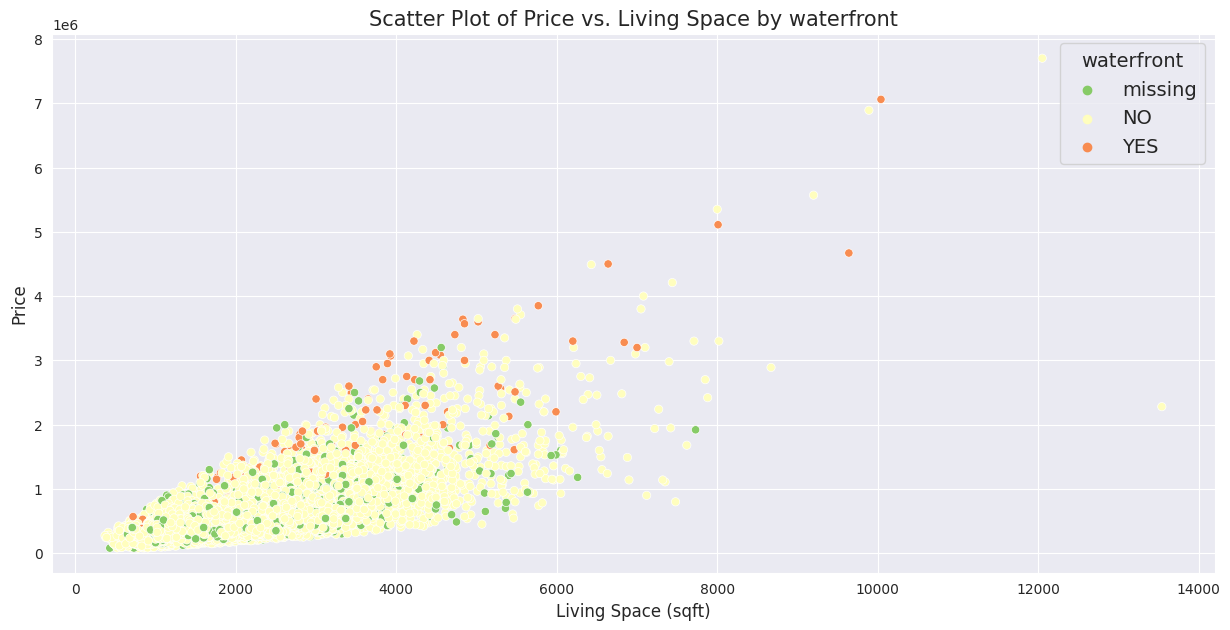

In [69]:
# Create a figure with specified size
plt.figure(figsize=(15, 7))

# Create a scatterplot using Seaborn
sns.scatterplot(data=df, x='sqft_living', y='price', hue='waterfront', palette='RdYlGn_r')

# Set the x-axis label
plt.xlabel('Living Space (sqft)', fontsize=12)

# Set the y-axis label
plt.ylabel('Price', fontsize=12)

# Set the title for the plot
plt.title('Scatter Plot of Price vs. Living Space by waterfront', fontsize=15)

# Add a legend with a title
plt.legend(title='waterfront', fontsize=14, title_fontsize=14)

# Display the plot
plt.show()

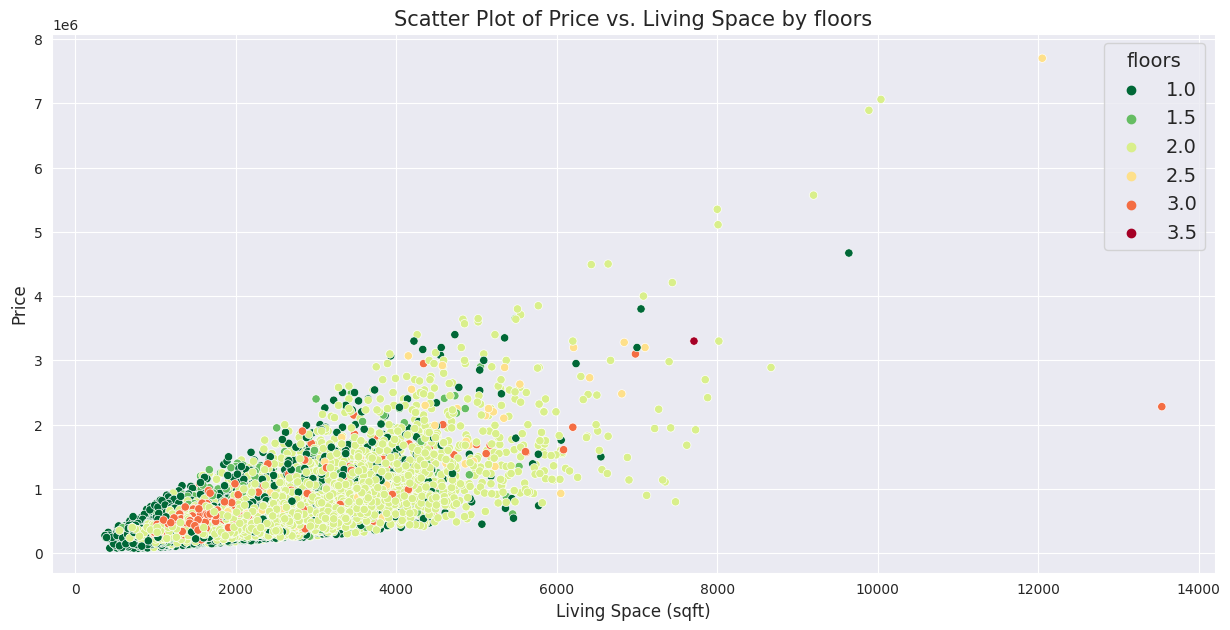

In [70]:
# Create a figure with specified size
plt.figure(figsize=(15, 7))

# Create a scatterplot using Seaborn
sns.scatterplot(data=df, x='sqft_living', y='price', hue='floors', palette='RdYlGn_r')

# Set the x-axis label
plt.xlabel('Living Space (sqft)', fontsize=12)

# Set the y-axis label
plt.ylabel('Price', fontsize=12)

# Set the title for the plot
plt.title('Scatter Plot of Price vs. Living Space by floors', fontsize=15)

# Add a legend with a title
plt.legend(title='floors', fontsize=14, title_fontsize=14)

# Display the plot
plt.show()

In [71]:
outliers_df = df[['sqft_living','sqft_above','sqft_living15']]

upper_limit = outliers_df.mean() + 3*outliers_df.std()
lower_limit = outliers_df.mean() - 3 * outliers_df.std()

outliers = df.loc[(outliers_df > upper_limit).any(axis=1) | (outliers_df < lower_limit).any(axis=1)]


In [72]:

# # new_df.head()
# plt.figure(figsize=(20,10))
# sns.heatmap(df.corr(), annot=True)
# plt.show()

In [73]:
df['zips'] = df['zipcode'].apply(lambda x: str(x)[2:]).astype(int)

In [74]:
# # # # df['zips'].corr(df['price'])


# # # # Assuming df is your DataFrame and 'zips' is the column you want to convert to integers
# # # df['zips'] = pd.to_numeric(df['zips'], errors='coerce', downcast='integer')
# df['zips'].corr(df['price'])
# # Assuming df is your DataFrame and 'zips' is the column you want to convert to integers
# # df['zips'] = df['zips'].astype(int)

# # df['zips'].dtypes
# df['zips'].isna().sum()
# df['zips']
# df.drop(columns=['zips'], inplace=True, axis=1)

df['zips'].corr(df['price'])

-0.05343401786392453

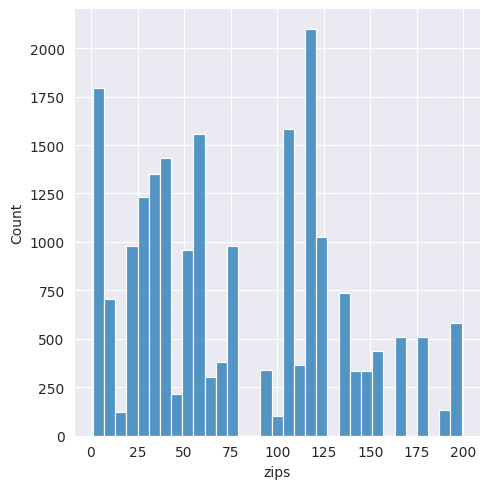

In [75]:
sns.displot(data=df, x='zips')

## <ins> Modelling </ins>

#### We did predictions using three regression analysis models namely:
* StatsModels.
* Scikit-learn.
* LightGBM.

#### We used the three models to analyse the r2 score in each and extract meaningfull insights that influence the prices of houses in the King County region. The insights are to be taken from the best performing model among the three. These insights are  very necessary as they may help in planning in the booming real estate business in the King County region.

#### We start off with a simple linera regression model to using an independent variable with the highest correlation with price.

In [76]:
df.corr()['price'].sort_values()

# xlog = np.log(df['sqft_living'])
# xlog.corr(df['price'])

<ipython-input-76-59418c1c9d06>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


neighborhood_4        -0.203993
neighborhood_2        -0.167855
neighborhood_9        -0.146371
neighborhood_8        -0.126814
neighborhood_6        -0.103535
age_house             -0.054786
zipcode               -0.053434
zips                  -0.053434
neighborhood_5        -0.022844
month                 -0.009986
quarter               -0.008623
selling_year           0.004431
long                   0.022521
house_condition        0.034585
renovated              0.050397
yr_built               0.054861
sqft_lot15_category    0.056564
neighborhood_3         0.066357
sqft_lot15             0.083534
sqft_lot               0.088402
neighborhood_1         0.134440
living15_3             0.140541
living15_1             0.181782
sqft_3                 0.237166
floors                 0.256628
sqft_2                 0.261286
lat                    0.307662
bedrooms               0.316381
sqft_basement          0.323019
neighborhood_7         0.356926
view                   0.397182
living15

#### The square feet of the living room seems to be the one with a high correlation with price.

In [77]:
X_baseline = df[['sqft_living','zips']]
y_baseline = df['price']

baseline_model = sm.OLS(y_baseline, sm.add_constant(X_baseline)).fit()
print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                 1.056e+04
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:08:06   Log-Likelihood:            -2.9268e+05
No. Observations:               21080   AIC:                         5.854e+05
Df Residuals:                   21077   BIC:                         5.854e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.061e+05   5621.949    -18.870      

##### For every increase in 1sqft of the living room, there is a 280.69 Dollars on price.

### <ins> Multiple Regression model </ins>

In [78]:
X_multiple = df[['sqft_living','gradings']]
y_multiple = df['price']

multiple_model = sm.OLS(y_multiple, sm.add_constant(X_multiple)).fit()
print(multiple_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                 1.212e+04
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:08:06   Log-Likelihood:            -2.9193e+05
No. Observations:               21080   AIC:                         5.839e+05
Df Residuals:                   21077   BIC:                         5.839e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.011e+05   1.35e+04    -44.626      

#### The next predictor that had a higher correlation with price was gradings. The model is statistically significant because the p_value is less than the alpha value of 0.05
#### Interpretation:
* For every positive change in gradings, the price increases by 99250.
* For every increase in square feet of the living room, the price increases by about 184

#### <ins> Multiple linear model with log transformed target and predictor </ins>
##### The target variable which is price seemed to be skewed and therefore the need to log transform it so as to meet the assumptins of any linear regresssion model.

In [79]:
df2 = df.copy()
df2['sqft_living_log'] = np.log(df2['sqft_living'])

X_log_multiple = df2[['sqft_living_log']]
y_log_multiple = np.log(df2['price'])

multiple_log_model = sm.OLS(y_log_multiple, sm.add_constant(X_log_multiple)).fit()
print(multiple_log_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.759e+04
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:08:06   Log-Likelihood:                -9988.6
No. Observations:               21080   AIC:                         1.998e+04
Df Residuals:                   21078   BIC:                         2.000e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.7251      0.048    1

#### Log transforming both predictors and target proves even worse. The model only explains 45%  of variance.

In [80]:
X = df2[['sqft_living','gradings','condition','bathrooms','lat','sqft_living15','long']]
y = np.log(df2['price'])

target_log_model = sm.OLS(y , sm.add_constant(X)).fit()
print(target_log_model.summary())

ValueError: ignored

#### The model is statistically significant with all the coefficients p-values less than 0.05.

#### Coefficients interpretation:
* For every increase in latitude, there is a decrease of about 0.007% in price.
* For every incease of 1 bathroom, there is an incraese of about 0.0755% change in price.
* For every change in location(zipcode), there is a decrease of about 0.0002% change in price.
* For every change in gradings, there is about a 0.14% change in price.
* For every increase in neighborhood 4, there is a decrease of about 0.50% in price.
* For every increase in neighborhood 2, there is a decrease of about 0.48% in price.
* For every increase in neighborhood 7, there is an increase of about 0.21% in price.
* For every increase in neighborhood 1, there is a decrease of about 0.19% in price.


#### <ins> Scikit-learn Model </ins>
We seek to find out how the accuracy score would be affected when using Scikit learn regression analysis. We split the data into training and test sets to have  a better score on how the model would perform on unseen or new data.

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
model_scikit_learn = lr.fit(X_train, y_train)

y_pred = model_scikit_learn.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(r2)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")
print(f"R-squared (R2) Score: {rmse}")

In [ ]:
scaler = StandardScaler()
x_trained_scaler = scaler.fit_transform(X_train)
x_test_scaler = scaler.transform(X_test)

In [ ]:
model_sklearn = lr.fit(x_trained_scaler,y_train)
model_pred = model_sklearn.predict(x_test_scaler)
rs_scaled = r2_score(y_test,model_pred)
print(rs_scaled)

#### The model only accounts for about 80% of variance when tested with new data.
We thereafter sought to improve our model using cross validation using 20 folds and this takes care of the random state in the train test split. Different random states produce different results. The Kfold cross validation takes care of the random state and averages the scores ofvarious random states.

In [ ]:
# Hyperparameter tuning using KFold validation.
kfold_validation = KFold(20)
cross_results = cross_val_score(lr, X_train,y_train, cv=kfold_validation)
print(np.mean(cross_results))

#### <ins> LightGBM model </ins>
LightGBM offers better accuracies for various machine learning tasks due to its intergrated ability of gradient boosting.

In [ ]:
# Light GBM model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train,y_train)

y_pred_lgbm = lgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lgbm)
print(f"Mean Squared Error (MSE): {mse}")

r2 = r2_score(y_test, y_pred_lgbm)
rmse = np.sqrt(r2)
print(f"R-squared (R2) Score: {r2:.2f}")
print(rmse)

#### This model has a score of 87% which is a way better performance than the statsmodels and scikit-learn.
We will also seek to find out the most important features used by the model to get the 88% accuracy score.


In [ ]:
# Plot the features that influence house prices.
lgb.plot_importance(lgb_model, height=.5)

In [ ]:
lgb.plot_importance(lgb_model, importance_type="gain", figsize=(8,4),title="LightGBM feature importance (gain)")

#### LightGBM plots the feature importance plots. The first plot shows the splits importance. This plot shows which predictors have been severally used by the model in each iteration to influence the overall score.
The second plot shows the features which have contributed immensely to the overall score of the model. These plots usually have a slight difference in the features given more weights and importance.
As seen in the plots the house gradings, location, living space and neighborhood 7 seem to be the main drivers of house prices.

##### A Plot of the SHAP values offers even good visualization of how individual predictor variables cahnge with respect to price of houses. It offers more insights of the predictors contributions to the overall model performance unlike the feature importance plot above. The Latitude which signifies location, the house gradings, and the living room space have massive influence on the price of the houses.
The SHAP values offer a visual representation of how the model arrived at a score of 88%.

In [ ]:
explainer = shap.TreeExplainer(lgb_model)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

##### The plot confirms the following:
* Houses with good gradings and spacious homes always fetch for higher prices.
* Neighbourhoods influence the price of houses especially neighborhood 7 followed by neighborhood 8. Neighborhood 5 seems to be the cheapest neighborhood.
* Houses in the southern direction of King County tend to fetch for lower prices compaired to those in the north.(Latitude-North/South)
* As the house view conditions improve so does the price of the houses.


##### The plot confirms everything we know from domain knowledge especially about how neighborhoods influence prices. This means our model is making the correct assumptions.

#### LightGBM performance is better than StatsModels and Scikit-learn with a score of 87%.

##### We used LightGBM because:
* It offers a higher accuracy by combining multiple decision trees to create a strong predictive model and handles overfitting well.
* It provides feature importance plots(splits and gains) which are very vital to knowing the most important features.
* It handles categorical features better than the models used above.
* In the event the model is put into production, it can process large datasets with very good accuracies within a short time. Very good on computational and memory efficiency.
* It offers better hyperparameter tuning in the event the accuracy of prediction of any event is of great concern.

##### LightGBM also uses parallel computing which offers high accuracies with fast training speeds and has a low memory utilization. Should the model be put into production, it will be very efficient in handling large housing datasets and provide good accuracies to the King County Real Estate community in terms of determing pricing of homes.

### <ins> Conclusion </ins>

##### From the feature importance plots, the top four main factors driving house prices in the King county region include:

* The location of houses.
* The squarefeet of living room and that of neighbors..
* The house view condition
* The time taken to sell the house.
* Neighborhoods have different prices.

##### Objective 1
**Improving the house gradings right from construction with better designs and also investing in high-end neighborhoods seem to be the go-to rennovation to realize a good return on investment(ROI)**

##### Objective 2
**The two main factors influencing prices in the King County region are the house gradings and the size of the homes as well as neighborhoods. Investing on these guarantees a good ROI.**

##### Objective 3
**The lightGBM model offers the best accuracy in house prices predictions.**

##### Objective 4
**Most low-priced houses and homes seem to be more in neighborhoods 5 and 2 which seem to be in the Southern direction of King County region.**
